In [3]:
# 필요한 라이브러리 설치
!pip install opencv-python-headless
!pip install pytesseract
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-kor is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# 필요한 라이브러리 설치
!pip install moviepy

import os
from moviepy.editor import VideoFileClip

def extract_first_minute(video_path, output_path):
    # 파일명 추출
    video_name = os.path.basename(video_path)
    output_name = "1min_" + video_name
    full_output_path = os.path.join(output_path, output_name)

    try:
        # 비디오 로드
        video = VideoFileClip(video_path)

        # 처음 1분(60초) 추출
        first_minute = video.subclip(0, 60)

        # 저장
        first_minute.write_videofile(full_output_path)

        # 메모리 해제
        video.close()
        first_minute.close()

        print(f"성공적으로 저장되었습니다: {full_output_path}")

    except Exception as e:
        print(f"에러가 발생했습니다: {str(e)}")

# 함수 실행
video_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4'
output_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/'

extract_first_minute(video_path, output_path)

Mounted at /content/drive


  if event.key is 'enter':



Moviepy - Building video /content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min_[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4.
MoviePy - Writing audio in 1min_[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.)TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min_[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min_[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4
성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min_[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4


In [2]:
short_video_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4'

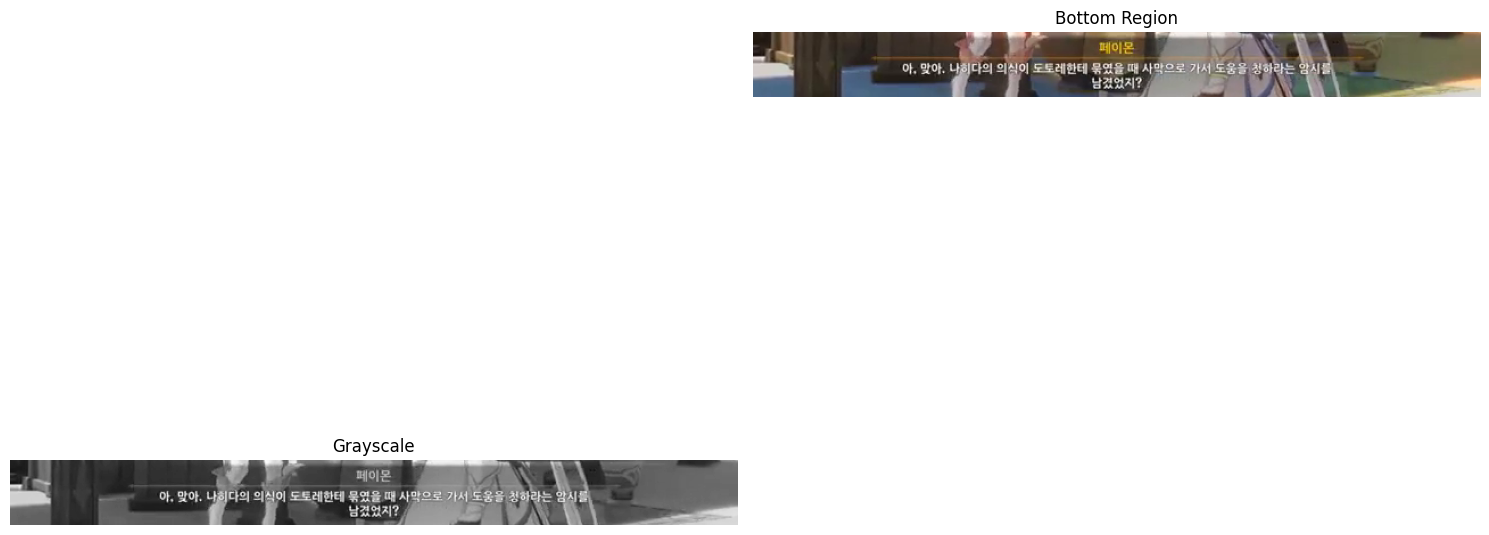

timestamp: 7.00, meaningful text: 0”     개  년  ㆍ  ：


KeyboardInterrupt: 

In [6]:
import cv2
import numpy as np
import pytesseract
from moviepy.editor import VideoFileClip
import time
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

def show_preprocessing_steps(frame, bottom_region, gray, binary):
    # matplotlib 설정
    plt.figure(figsize=(15, 10))

    # # 원본 프레임
    # plt.subplot(221)
    # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    # plt.title('Original Frame')
    # plt.axis('off')

    # 하단 영역
    plt.subplot(222)
    plt.imshow(cv2.cvtColor(bottom_region, cv2.COLOR_BGR2RGB))
    plt.title('Bottom Region')
    plt.axis('off')

    # 그레이스케일 이미지
    plt.subplot(223)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # # 이진화 이미지
    # plt.subplot(224)
    # plt.imshow(binary, cmap='gray')
    # plt.title('Binary')
    # plt.axis('off')

    plt.tight_layout()
    display(plt.gcf())
    plt.close()

def extract_subtitles(video_path):
    # 대화 저장을 위한 리스트
    Dialogue = []

    # 비디오 열기
    cap = cv2.VideoCapture(video_path)

    # 비디오 속성 가져오기
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"fps: {fps}")
    print(f"frame_count: {frame_count}")

    # 이전 텍스트를 저장할 변수
    prev_text = ""

    # 프레임 건너뛰기 간격
    frame_interval = 15

    current_frame = 0
    while current_frame < frame_count:
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()

        if not ret:
            break

        # 프레임의 하단 부분만 추출 (하단 영역)
        height = frame.shape[0]
        bottom_region = frame[int(height*0.77):int(height*0.93), :]

        # 이미지 전처리
        gray = cv2.cvtColor(bottom_region, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # OCR 수행
        text = pytesseract.image_to_string(binary, lang='kor+eng').strip()

        # 의미 있는 텍스트가 발견되면 전처리 과정 시각화
        if text and text != prev_text and len(text) > 3:
            clear_output(wait=True)
            show_preprocessing_steps(frame, bottom_region, gray, binary)

            timestamp = current_frame / fps
            Dialogue.append({
                'timestamp': timestamp,
                'text': text
            })
            prev_text = text
            print(f"timestamp: {timestamp:.2f}, meaningful text: {text}")

            # 잠시 대기하여 이미지를 확인할 수 있도록 함
            time.sleep(1)

        current_frame += frame_interval

    # 자원 해제
    cap.release()

    return Dialogue

# 함수 실행
short_video_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4'
extracted_dialogue = extract_subtitles(short_video_path)

# 결과 출력
print("\n추출된 대화:")
for d in extracted_dialogue:
    print(f"[{d['timestamp']:.2f}초] {d['text']}")

# 결과를 파일로 저장
import json
output_json_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/dialogue.json'
with open(output_json_path, 'w', encoding='utf-8') as f:
    json.dump(extracted_dialogue, f, ensure_ascii=False, indent=2)

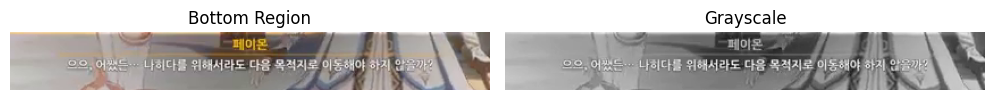

timestamp: 59.00, meaningful text: 1 1"        페이몬    /           해
Sao Wee eC Mnestee Meet ge Be 0
i       = 10 눈

추출된 대화:
[1.00초] a    iS        e.    a2      -
[2.00초] 기               cog                 A _\ cy
품 우리가 가라반 수도원에는 맨 처음에 무슨 일로 왔었더라?   ea
[3.00초] a    05         츠ㅇ
_ Hole          >
= Sue CC ee 00 =
[4.00초] EES              fa SS
ee eC 000 -
에
[5.00초] |                er:
a>
[6.00초] tl   HR
Coe Loe ener a mores         ‘
cio
[7.00초] Hole                            년
Geos Loe) eon                                  '
에                       0 농
[8.00초] 전  00. ~      0"
Crue cc)  Lah a        in a
[9.00초] [수  300 로    Ww
9. ah Haale wate a a       pe
[10.00초] ”   더       7 &
a    - 고
0000, ) 1 -21아디 우었을 대 사악으로서 도웅을 d,

Ee    fe eS
[11.00초] 3”   페이온
0) WES eb ORans Piet Riper einer 20)  alk
ae attr 을 ere
[12.00초] ~ GH        개          페이몬                     ~
1 다아 래던스 1 oh
eer                  yr   4
[13.00초] -  . ~
[14.00초] Ta ee. bee
* Gd hag oy “aa De
[15.00초] 7”. “0 _.뿌

In [14]:
import cv2
import numpy as np
import pytesseract
from moviepy.editor import VideoFileClip
import time
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

def show_preprocessing_steps(frame, bottom_region, gray):
    # matplotlib 설정
    plt.figure(figsize=(15, 8))

    # # 원본 프레임
    # plt.subplot(131)
    # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    # plt.title('Original Frame')
    # plt.axis('off')

    # 하단 영역
    plt.subplot(132)
    plt.imshow(cv2.cvtColor(bottom_region, cv2.COLOR_BGR2RGB))
    plt.title('Bottom Region')
    plt.axis('off')

    # 그레이스케일 이미지
    plt.subplot(133)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    plt.tight_layout()
    display(plt.gcf())
    plt.close()

def extract_subtitles(video_path):
    # 대화 저장을 위한 리스트
    Dialogue = []

    # 비디오 열기
    cap = cv2.VideoCapture(video_path)

    # 비디오 속성 가져오기
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"fps: {fps}")
    print(f"frame_count: {frame_count}")

    # 이전 텍스트를 저장할 변수
    prev_text = ""

    # 프레임 건너뛰기 간격
    frame_interval = 30

    current_frame = 0
    while current_frame < frame_count:
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()

        if not ret:
            break

        # 프레임의 하단 부분만 추출 (하단 영역)
        height = frame.shape[0]
        width = frame.shape[1]
        bottom_region = frame[int(height*0.78):int(height*0.92), int(width*0.17):int(width*0.83)]

        # 이미지 전처리 - 그레이스케일만 적용
        gray = cv2.cvtColor(bottom_region, cv2.COLOR_BGR2GRAY)

        # 그레이스케일 이미지에서 직접 OCR 수행
        text = pytesseract.image_to_string(gray, lang='kor+eng', config='--psm 6').strip()

        # 의미 있는 텍스트가 발견되면 전처리 과정 시각화
        if text and text != prev_text and len(text) > 3:
            clear_output(wait=True)
            show_preprocessing_steps(frame, bottom_region, gray)

            timestamp = current_frame / fps
            Dialogue.append({
                'timestamp': timestamp,
                'text': text
            })
            prev_text = text
            print(f"timestamp: {timestamp:.2f}, meaningful text: {text}")

            # 잠시 대기하여 이미지를 확인할 수 있도록 함
            time.sleep(1)

        current_frame += frame_interval

    # 자원 해제
    cap.release()

    return Dialogue

# 함수 실행
short_video_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4'
extracted_dialogue = extract_subtitles(short_video_path)

# 결과 출력
print("\n추출된 대화:")
for d in extracted_dialogue:
    print(f"[{d['timestamp']:.2f}초] {d['text']}")

# 결과를 파일로 저장
import json
output_json_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/dialogue.json'
with open(output_json_path, 'w', encoding='utf-8') as f:
    json.dump(extracted_dialogue, f, ensure_ascii=False, indent=2)

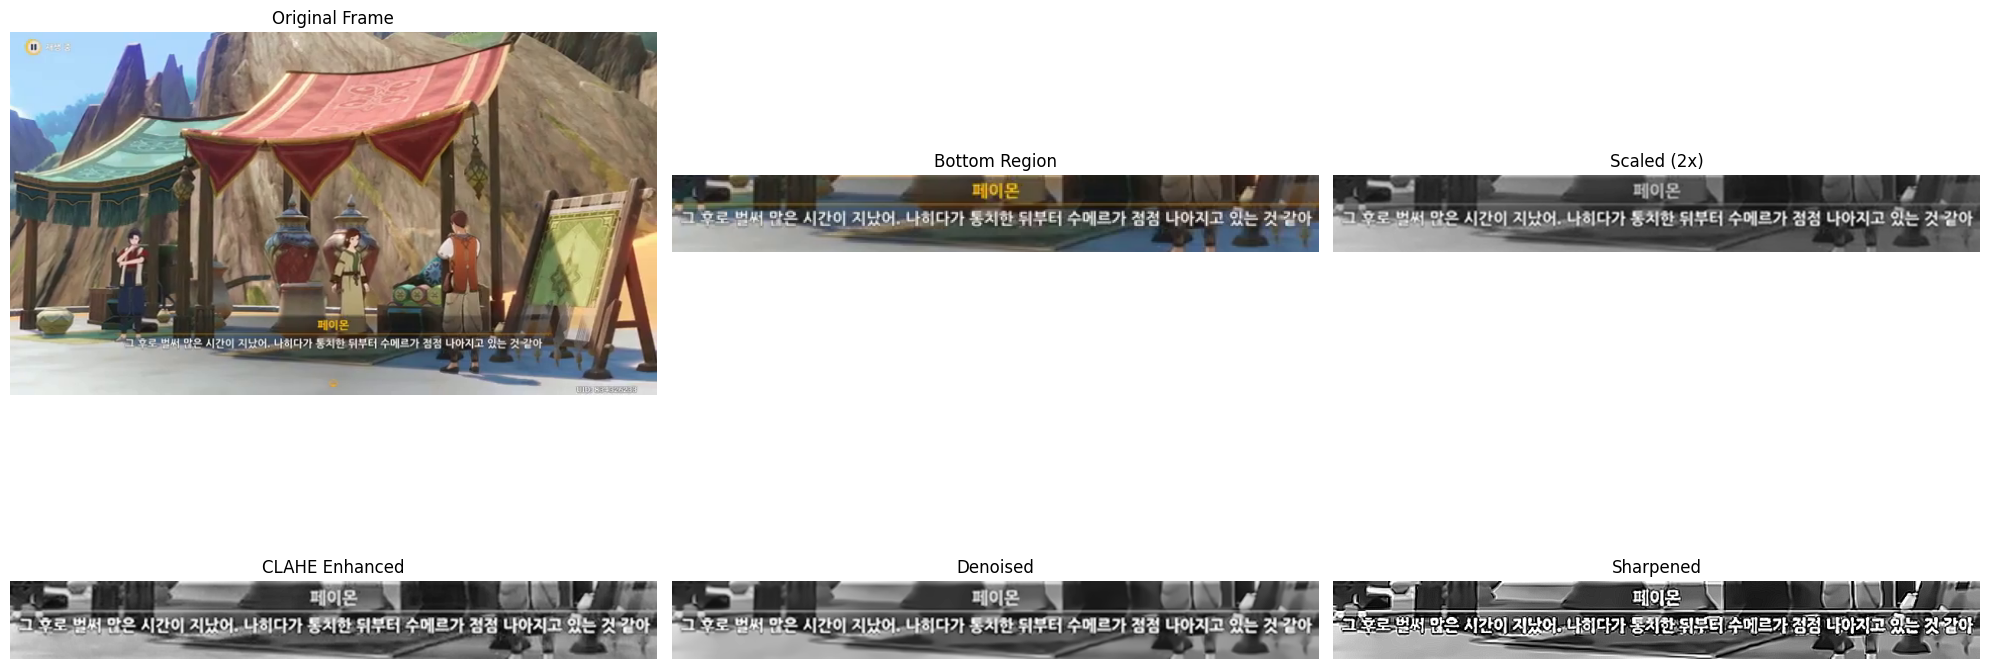

timestamp: 18.00, meaningful text: sca : ere     은   | 1 개
SO aed PO a sake ea ea AR
ae 울 ,"


KeyboardInterrupt: 

In [20]:
import cv2
import numpy as np
import pytesseract
from moviepy.editor import VideoFileClip
import time
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

def enhance_image(image):
    # 이미지 크기 2배 확대
    scaled = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # CLAHE(Contrast Limited Adaptive Histogram Equalization) 적용
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(scaled)

    # 노이즈 제거
    denoised = cv2.fastNlMeansDenoising(enhanced, None, h=10, searchWindowSize=21, templateWindowSize=7)

    # 샤프닝
    kernel = np.array([[-1,-1,-1],
                      [-1, 9,-1],
                      [-1,-1,-1]])
    sharpened = cv2.filter2D(denoised, -1, kernel)

    return scaled, enhanced, denoised, sharpened

def show_preprocessing_steps(frame, bottom_region, preprocessed_images):
    plt.figure(figsize=(20, 10))

    # 원본 프레임
    plt.subplot(231)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Original Frame')
    plt.axis('off')

    # 하단 영역
    plt.subplot(232)
    plt.imshow(cv2.cvtColor(bottom_region, cv2.COLOR_BGR2RGB))
    plt.title('Bottom Region')
    plt.axis('off')

    # 확대된 이미지
    plt.subplot(233)
    plt.imshow(preprocessed_images[0], cmap='gray')
    plt.title('Scaled (2x)')
    plt.axis('off')

    # CLAHE 적용
    plt.subplot(234)
    plt.imshow(preprocessed_images[1], cmap='gray')
    plt.title('CLAHE Enhanced')
    plt.axis('off')

    # 노이즈 제거
    plt.subplot(235)
    plt.imshow(preprocessed_images[2], cmap='gray')
    plt.title('Denoised')
    plt.axis('off')

    # 샤프닝
    plt.subplot(236)
    plt.imshow(preprocessed_images[3], cmap='gray')
    plt.title('Sharpened')
    plt.axis('off')

    plt.tight_layout()
    display(plt.gcf())
    plt.close()

def extract_subtitles(video_path):
    Dialogue = []
    cap = cv2.VideoCapture(video_path)

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"fps: {fps}")
    print(f"frame_count: {frame_count}")

    prev_text = ""
    frame_interval = 30

    current_frame = 0
    while current_frame < frame_count:
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()

        if not ret:
            break

        # 하단 영역 추출
        height, width = frame.shape[:2]
        bottom_region = frame[int(height*0.78):int(height*0.92), int(width*0.17):int(width*0.83)]

        # 그레이스케일 변환
        gray = cv2.cvtColor(bottom_region, cv2.COLOR_BGR2GRAY)

        # 이미지 개선
        scaled, enhanced, denoised, sharpened = enhance_image(gray)

        # 개선된 이미지로 OCR 수행
        # psm 6: 균일한 텍스트 블록
        # oem 3: 기본 + LSTM OCR
        config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(sharpened, lang='kor+eng', config=config).strip()

        if text and text != prev_text and len(text) > 3:
            clear_output(wait=True)
            show_preprocessing_steps(frame, bottom_region,
                                  [scaled, enhanced, denoised, sharpened])

            timestamp = current_frame / fps
            Dialogue.append({
                'timestamp': timestamp,
                'text': text
            })
            prev_text = text
            print(f"timestamp: {timestamp:.2f}, meaningful text: {text}")

            time.sleep(1)

        current_frame += frame_interval

    cap.release()
    return Dialogue

# 함수 실행
short_video_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4'
extracted_dialogue = extract_subtitles(short_video_path)

# 결과 출력
print("\n추출된 대화:")
for d in extracted_dialogue:
    print(f"[{d['timestamp']:.2f}초] {d['text']}")

# 결과를 파일로 저장
import json
output_json_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/dialogue.json'
with open(output_json_path, 'w', encoding='utf-8') as f:
    json.dump(extracted_dialogue, f, ensure_ascii=False, indent=2)

In [ ]:
import cv2
import numpy as np
import pytesseract
from moviepy.editor import VideoFileClip
import time
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

def enhance_image(image):
    # 이미지 크기 2배 확대
    scaled = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # CLAHE(Contrast Limited Adaptive Histogram Equalization) 적용
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(scaled)

    # 노이즈 제거
    denoised = cv2.fastNlMeansDenoising(enhanced, None, h=10, searchWindowSize=21, templateWindowSize=7)

    # 샤프닝
    kernel = np.array([[-1,-1,-1],
                      [-1, 9,-1],
                      [-1,-1,-1]])
    sharpened = cv2.filter2D(denoised, -1, kernel)

    return scaled, enhanced, denoised, sharpened

def perform_ocr(image):
    config = r'--oem 3 --psm 6'
    return pytesseract.image_to_string(image, lang='kor+eng', config=config).strip()

def show_preprocessing_steps(frame, bottom_region, preprocessed_images):
    plt.figure(figsize=(20, 15))

    # OCR 결과 저장
    ocr_results = []

    # 원본 그레이스케일
    gray = cv2.cvtColor(bottom_region, cv2.COLOR_BGR2GRAY)
    ocr_gray = perform_ocr(gray)

    # 각 전처리 단계별 OCR
    ocr_results = [
        perform_ocr(img) for img in preprocessed_images
    ]

    # 이미지와 OCR 결과 표시
    titles = [
        ('Original Frame', None),
        ('Bottom Region (Gray)', ocr_gray),
        ('Scaled (2x)', ocr_results[0]),
        ('CLAHE Enhanced', ocr_results[1]),
        ('Denoised', ocr_results[2]),
        ('Sharpened', ocr_results[3])
    ]

    for idx, (title, ocr_text) in enumerate(titles):
        plt.subplot(2, 3, idx+1)

        if idx == 0:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        elif idx == 1:
            plt.imshow(gray, cmap='gray')
        else:
            plt.imshow(preprocessed_images[idx-2], cmap='gray')

        title_text = title
        if ocr_text:
            title_text += f'\nOCR: {ocr_text}'
        plt.title(title_text, fontsize=10, pad=10)
        plt.axis('off')

    plt.tight_layout()
    display(plt.gcf())
    plt.close()

def extract_subtitles(video_path):
    Dialogue = []
    cap = cv2.VideoCapture(video_path)

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"fps: {fps}")
    print(f"frame_count: {frame_count}")

    prev_text = ""
    frame_interval = 30

    current_frame = 0
    while current_frame < frame_count:
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()

        if not ret:
            break

        # 하단 영역 추출
        height, width = frame.shape[:2]
        bottom_region = frame[int(height*0.78):int(height*0.92), int(width*0.17):int(width*0.83)]

        # 그레이스케일 변환
        gray = cv2.cvtColor(bottom_region, cv2.COLOR_BGR2GRAY)

        # 이미지 개선
        scaled, enhanced, denoised, sharpened = enhance_image(gray)

        # 최종 이미지로 OCR 수행
        text = perform_ocr(sharpened)

        if text and text != prev_text and len(text) > 3:
            clear_output(wait=True)
            show_preprocessing_steps(frame, bottom_region,
                                  [scaled, enhanced, denoised, sharpened])

            timestamp = current_frame / fps
            Dialogue.append({
                'timestamp': timestamp,
                'text': text
            })
            prev_text = text
            print(f"\nFinal timestamp: {timestamp:.2f}, text: {text}")

            time.sleep(2)  # 결과를 좀 더 오래 보여주기 위해 대기 시간 증가

        current_frame += frame_interval

    cap.release()
    return Dialogue

# 함수 실행
short_video_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4'
extracted_dialogue = extract_subtitles(short_video_path)

# 결과 출력 및 저장
print("\n최종 추출된 대화:")
for d in extracted_dialogue:
    print(f"[{d['timestamp']:.2f}초] {d['text']}")

import json
output_json_path = '/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/dialogue.json'
with open(output_json_path, 'w', encoding='utf-8') as f:
    json.dump(extracted_dialogue, f, ensure_ascii=False, indent=2)

In [ ]:
!pip install transformers

In [ ]:
!pip install "paddlepaddle-gpu>=2.0.0" # GPU 버전
!pip install "paddleocr>=2.0.1"

In [15]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00


KeyboardInterrupt: 

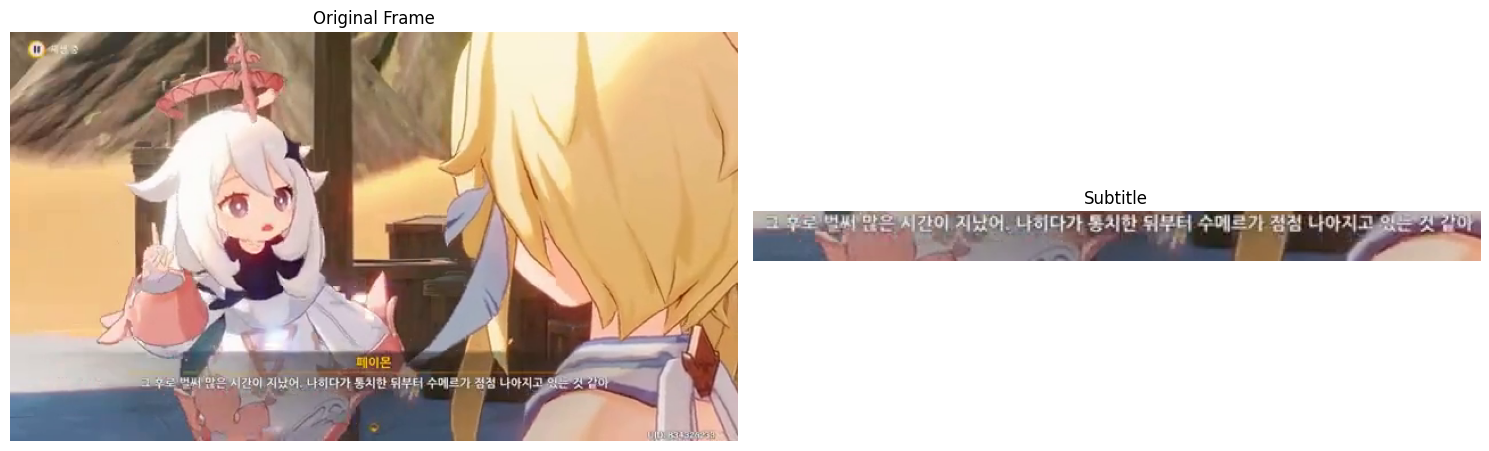

In [11]:
import torch
import numpy as np
import cv2
from paddleocr import PaddleOCR
import json
import os
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

class SubtitleRecognizer:
    def __init__(self):
        # PaddleOCR 초기화 - 한글 모델 사용
        self.ocr = PaddleOCR(
            use_angle_cls=True,
            lang='korean',
            show_log=False
        )

    def preprocess_frame(self, frame: np.ndarray) -> np.ndarray:
        """프레임 전처리"""
        # 하단 영역 추출
        height, width = frame.shape[:2]
        bottom_region = frame[int(height*0.78):int(height*0.92),
                            int(width*0.17):int(width*0.83)]

        # 이미지 전처리
        # 크기 조정
        bottom_region = cv2.resize(bottom_region, None, fx=2.0, fy=2.0)

        # 대비 향상
        lab = cv2.cvtColor(bottom_region, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        enhanced = cv2.merge((cl,a,b))
        enhanced = cv2.cvtColor(enhanced, cv2.COLOR_LAB2BGR)

        return enhanced

    def recognize_subtitle(self, frame: np.ndarray) -> str:
        """자막 인식"""
        # 전처리
        processed_frame = self.preprocess_frame(frame)

        # OCR 수행
        result = self.ocr.ocr(processed_frame, cls=True)

        if not result or not result[0]:
            return ""

        # 인식된 모든 텍스트 결합
        texts = []
        for line in result[0]:
            text = line[1][0]  # OCR 결과에서 텍스트 추출
            confidence = line[1][1]  # 신뢰도
            if confidence > 0.5:  # 신뢰도가 50% 이상인 것만 사용
                texts.append(text)

        return " ".join(texts)

    def visualize_recognition(self, frame: np.ndarray, text: str):
        """인식 결과 시각화"""
        height, width = frame.shape[:2]
        # name_region = frame[int(height*0.78):int(height*0.84),
        #                     int(width*0.4):int(width*0.6)]
        bottom_region = frame[int(height*0.84):int(height*0.92),
                            int(width*0.17):int(width*0.83)]

        plt.figure(figsize=(15, 5))

        # 원본 프레임
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Original Frame')
        plt.axis('off')

        # 추출된 영역과 인식된 텍스트
        plt.subplot(122)
        plt.imshow(cv2.cvtColor(bottom_region, cv2.COLOR_BGR2RGB))
        plt.title('Subtitle')
        plt.axis('off')

        plt.tight_layout()
        display(plt.gcf())
        plt.close()

def extract_subtitles(video_path: str, output_path: str):
    """비디오에서 자막 추출"""
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"비디오 파일을 찾을 수 없습니다: {video_path}")

    extractor = SubtitleRecognizer()
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        raise ValueError(f"비디오 파일을 열 수 없습니다: {video_path}")

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Processing video: {fps} FPS, {frame_count} frames")
    print(f"Video duration: {frame_count/fps:.2f} seconds")

    subtitles = []
    prev_text = ""
    frame_interval = 30  # 1초마다 체크 (30fps 기준)

    for frame_idx in range(0, frame_count, frame_interval):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if not ret:
            print(f"Warning: Failed to read frame at index {frame_idx}")
            continue

        try:
            # 자막 인식
            text = extractor.recognize_subtitle(frame)

            # 중복 필터링 및 의미 있는 텍스트 필터링
            if text and text != prev_text and len(text.strip()) > 3:
                timestamp = frame_idx / fps
                subtitles.append({
                    'timestamp': timestamp,
                    'text': text
                })
                prev_text = text

                # 결과 시각화
                clear_output(wait=True)
                extractor.visualize_recognition(frame, text)
                print(f"[{timestamp:.2f}s] {text}")

        except Exception as e:
            print(f"Error processing frame {frame_idx}: {str(e)}")
            continue

    cap.release()

    if not subtitles:
        print("Warning: No subtitles were detected in the video")

    # 결과 저장
    try:
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(subtitles, f, ensure_ascii=False, indent=2)
        print(f"Results saved to {output_path}")
    except Exception as e:
        print(f"Error saving results: {str(e)}")

    return subtitles

if __name__ == "__main__":
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    output_path = "subtitles.json"

    try:
        print(f"Processing video file: {video_path}")
        subtitles = extract_subtitles(video_path, output_path)
    except Exception as e:
        print(f"Error: {str(e)}")

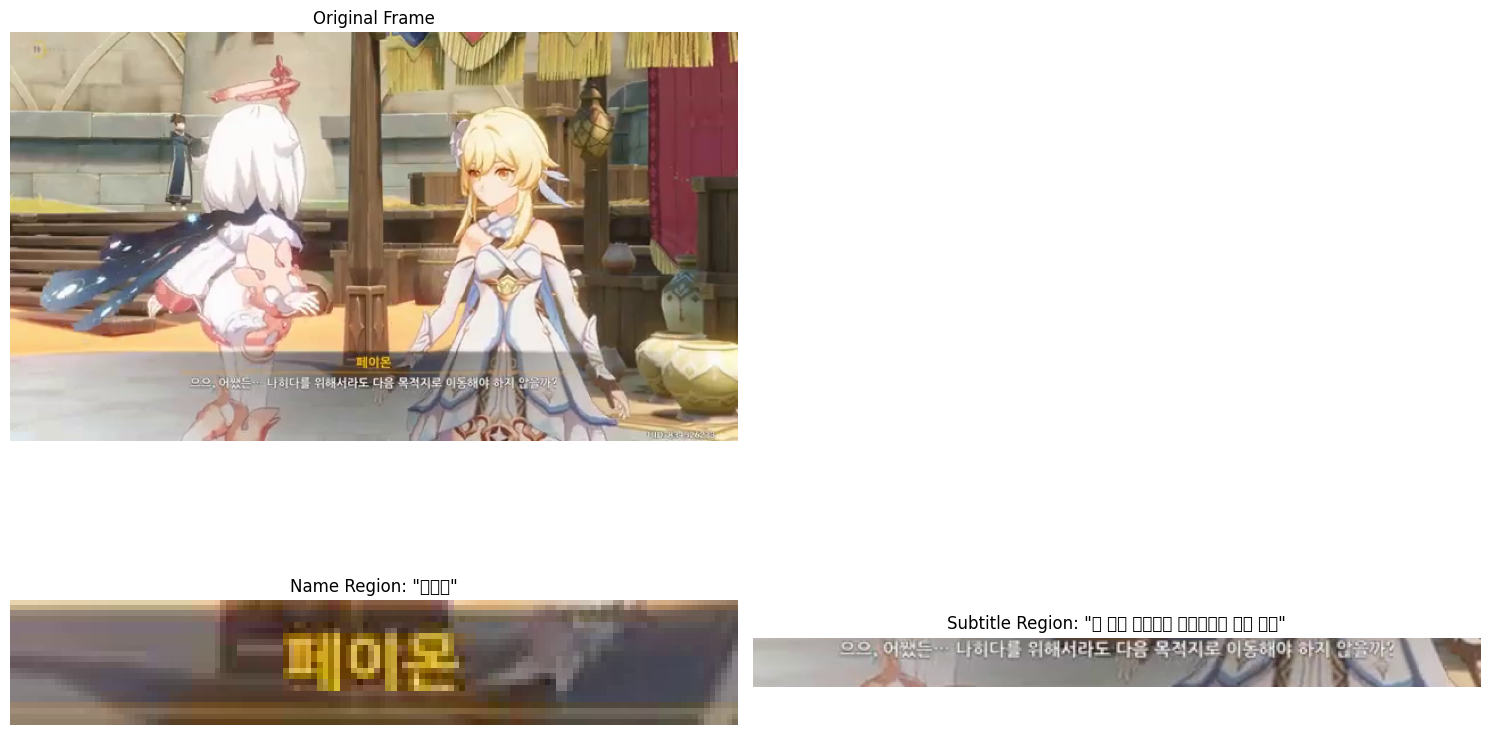

[59.00s] 페이든: 으 어든 나히다는 위해서라도 화둥 하지
Results saved to dialogue.json


In [12]:
import torch
import numpy as np
import cv2
from paddleocr import PaddleOCR
import json
import os
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

class SubtitleRecognizer:
    def __init__(self):
        self.ocr = PaddleOCR(
            use_angle_cls=True,
            lang='korean',
            show_log=False
        )

    def preprocess_region(self, region: np.ndarray) -> np.ndarray:
        """이미지 영역 전처리"""
        # 크기 조정
        region = cv2.resize(region, None, fx=2.0, fy=2.0)

        # 대비 향상
        lab = cv2.cvtColor(region, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        enhanced = cv2.merge((cl,a,b))
        enhanced = cv2.cvtColor(enhanced, cv2.COLOR_LAB2BGR)

        return enhanced

    def extract_regions(self, frame: np.ndarray) -> tuple:
        """이름과 자막 영역 추출"""
        height, width = frame.shape[:2]

        # 이름 영역 추출
        name_region = frame[int(height*0.78):int(height*0.84),
                          int(width*0.4):int(width*0.6)]

        # 자막 영역 추출
        subtitle_region = frame[int(height*0.84):int(height*0.92),
                              int(width*0.17):int(width*0.83)]

        return name_region, subtitle_region

    def recognize_text(self, region: np.ndarray) -> str:
        """텍스트 인식"""
        # 전처리
        processed_region = self.preprocess_region(region)

        # OCR 수행
        result = self.ocr.ocr(processed_region, cls=True)

        if not result or not result[0]:
            return ""

        # 인식된 모든 텍스트 결합
        texts = []
        for line in result[0]:
            text = line[1][0]  # OCR 결과에서 텍스트 추출
            confidence = line[1][1]  # 신뢰도
            if confidence > 0.5:  # 신뢰도가 50% 이상인 것만 사용
                texts.append(text)

        return " ".join(texts)

    def recognize_dialogue(self, frame: np.ndarray) -> tuple:
        """대화 인식"""
        # 영역 추출
        name_region, subtitle_region = self.extract_regions(frame)

        # 각 영역 텍스트 인식
        name = self.recognize_text(name_region)
        subtitle = self.recognize_text(subtitle_region)

        return name.strip(), subtitle.strip()

    def visualize_recognition(self, frame: np.ndarray, name: str, subtitle: str):
        """인식 결과 시각화"""
        name_region, subtitle_region = self.extract_regions(frame)

        plt.figure(figsize=(15, 10))

        # 원본 프레임
        plt.subplot(221)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Original Frame')
        plt.axis('off')

        # 이름 영역
        plt.subplot(223)
        plt.imshow(cv2.cvtColor(name_region, cv2.COLOR_BGR2RGB))
        plt.title(f'Name Region: "{name}"')
        plt.axis('off')

        # 자막 영역
        plt.subplot(224)
        plt.imshow(cv2.cvtColor(subtitle_region, cv2.COLOR_BGR2RGB))
        plt.title(f'Subtitle Region: "{subtitle}"')
        plt.axis('off')

        plt.tight_layout()
        display(plt.gcf())
        plt.close()

def extract_subtitles(video_path: str, output_path: str):
    """비디오에서 자막 추출"""
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"비디오 파일을 찾을 수 없습니다: {video_path}")

    extractor = SubtitleRecognizer()
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        raise ValueError(f"비디오 파일을 열 수 없습니다: {video_path}")

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Processing video: {fps} FPS, {frame_count} frames")
    print(f"Video duration: {frame_count/fps:.2f} seconds")

    dialogue_list = []
    prev_dialogue = ""
    frame_interval = 30

    for frame_idx in range(0, frame_count, frame_interval):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if not ret:
            print(f"Warning: Failed to read frame at index {frame_idx}")
            continue

        try:
            # 대화 인식
            name, subtitle = extractor.recognize_dialogue(frame)

            # 유효한 대화인 경우만 처리
            if name and subtitle:
                dialogue = f"{name}: {subtitle}"

                # 중복 필터링
                if dialogue != prev_dialogue:
                    timestamp = frame_idx / fps
                    dialogue_list.append({
                        'timestamp': timestamp,
                        'name': name,
                        'subtitle': subtitle,
                        'dialogue': dialogue
                    })
                    prev_dialogue = dialogue

                    # 결과 시각화
                    clear_output(wait=True)
                    extractor.visualize_recognition(frame, name, subtitle)
                    print(f"[{timestamp:.2f}s] {dialogue}")

        except Exception as e:
            print(f"Error processing frame {frame_idx}: {str(e)}")
            continue

    cap.release()

    if not dialogue_list:
        print("Warning: No dialogues were detected in the video")

    # 결과 저장
    try:
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(dialogue_list, f, ensure_ascii=False, indent=2)
        print(f"Results saved to {output_path}")
    except Exception as e:
        print(f"Error saving results: {str(e)}")

    return dialogue_list

if __name__ == "__main__":
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    output_path = "dialogue.json"

    try:
        print(f"Processing video file: {video_path}")
        dialogue_list = extract_subtitles(video_path, output_path)
    except Exception as e:
        print(f"Error: {str(e)}")

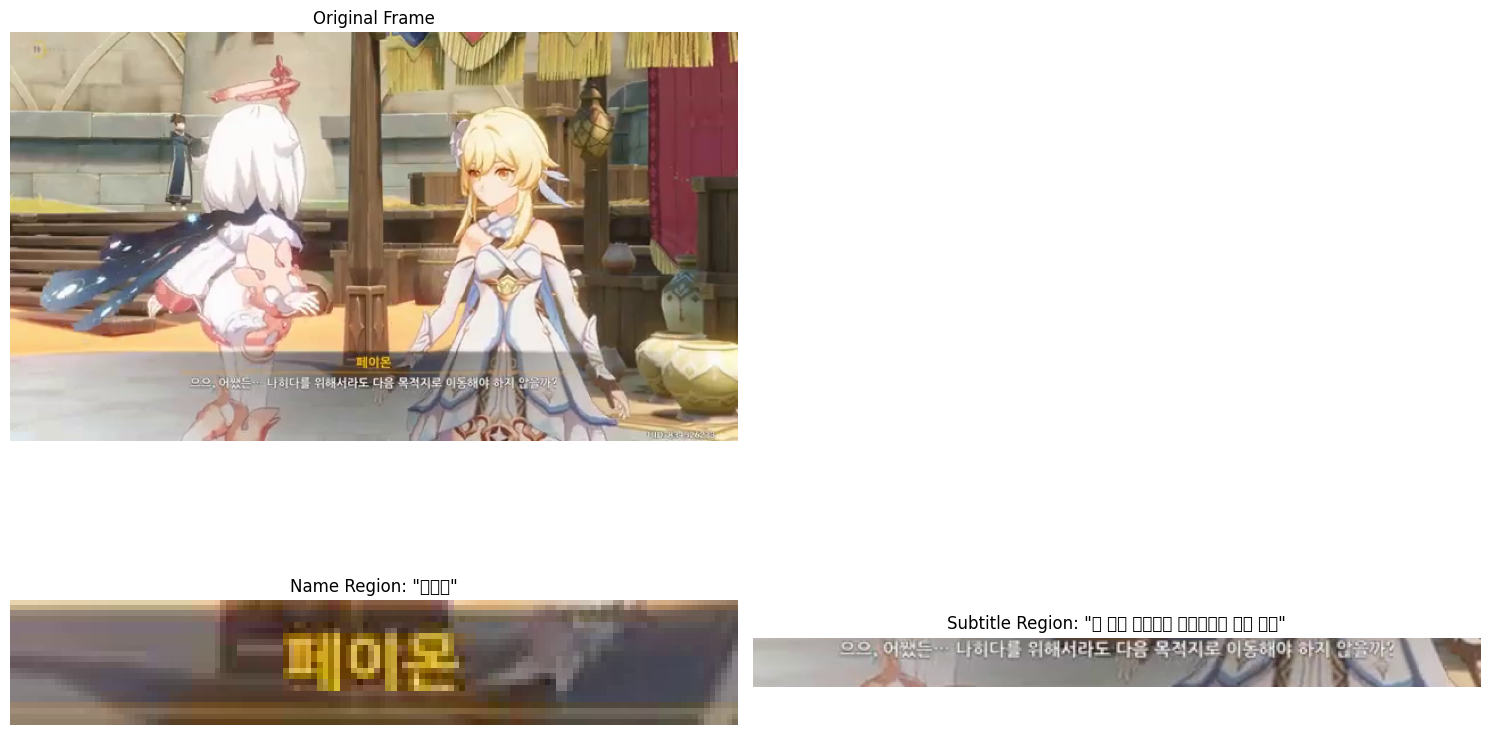

[59.00s] 페이몬: 으 어든 나히다는 위해서라도 화둥 하지
Results saved to dialogue.json


In [13]:
import torch
import numpy as np
import cv2
from paddleocr import PaddleOCR
import json
import os
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from difflib import get_close_matches

class SubtitleRecognizer:
    def __init__(self):
        self.ocr = PaddleOCR(
            use_angle_cls=True,
            lang='korean',
            show_log=False
        )

        # 이름 사전 정의
        self.name_vocabulary = [
            "페이몬", "루미네", "데히야", "푸리나",
            "느비예트", "리니", "리넷", "샤를로트"
        ]

    def preprocess_region(self, region: np.ndarray) -> np.ndarray:
        """이미지 영역 전처리"""
        # 크기 조정
        region = cv2.resize(region, None, fx=2.0, fy=2.0)

        # 대비 향상
        lab = cv2.cvtColor(region, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        enhanced = cv2.merge((cl,a,b))
        enhanced = cv2.cvtColor(enhanced, cv2.COLOR_LAB2BGR)

        return enhanced

    def extract_regions(self, frame: np.ndarray) -> tuple:
        """이름과 자막 영역 추출"""
        height, width = frame.shape[:2]

        # 이름 영역 추출
        name_region = frame[int(height*0.78):int(height*0.84),
                          int(width*0.4):int(width*0.6)]

        # 자막 영역 추출
        subtitle_region = frame[int(height*0.84):int(height*0.92),
                              int(width*0.17):int(width*0.83)]

        return name_region, subtitle_region

    def find_closest_name(self, detected_text: str) -> str:
        """가장 유사한 이름 찾기"""
        if not detected_text:
            return ""

        # 문자열 유사도를 기반으로 가장 가까운 이름 찾기
        matches = get_close_matches(detected_text, self.name_vocabulary, n=1, cutoff=0.6)

        return matches[0] if matches else ""

    def recognize_text(self, region: np.ndarray, is_name: bool = False) -> str:
        """텍스트 인식"""
        # 전처리
        processed_region = self.preprocess_region(region)

        # OCR 수행
        result = self.ocr.ocr(processed_region, cls=True)

        if not result or not result[0]:
            return ""

        # 인식된 모든 텍스트 결합
        texts = []
        for line in result[0]:
            text = line[1][0]  # OCR 결과에서 텍스트 추출
            confidence = line[1][1]  # 신뢰도
            if confidence > 0.5:  # 신뢰도가 50% 이상인 것만 사용
                texts.append(text)

        detected_text = " ".join(texts)

        # 이름 영역인 경우 vocabulary에서 가장 가까운 이름 찾기
        if is_name:
            return self.find_closest_name(detected_text)

        return detected_text

    def recognize_dialogue(self, frame: np.ndarray) -> tuple:
        """대화 인식"""
        # 영역 추출
        name_region, subtitle_region = self.extract_regions(frame)

        # 각 영역 텍스트 인식
        name = self.recognize_text(name_region, is_name=True)  # 이름 인식
        subtitle = self.recognize_text(subtitle_region)  # 자막 인식

        return name.strip(), subtitle.strip()

    def visualize_recognition(self, frame: np.ndarray, name: str, subtitle: str):
        """인식 결과 시각화"""
        name_region, subtitle_region = self.extract_regions(frame)

        plt.figure(figsize=(15, 10))

        # 원본 프레임
        plt.subplot(221)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Original Frame')
        plt.axis('off')

        # 이름 영역
        plt.subplot(223)
        plt.imshow(cv2.cvtColor(name_region, cv2.COLOR_BGR2RGB))
        plt.title(f'Name Region: "{name}"')
        plt.axis('off')

        # 자막 영역
        plt.subplot(224)
        plt.imshow(cv2.cvtColor(subtitle_region, cv2.COLOR_BGR2RGB))
        plt.title(f'Subtitle Region: "{subtitle}"')
        plt.axis('off')

        plt.tight_layout()
        display(plt.gcf())
        plt.close()

def extract_subtitles(video_path: str, output_path: str):
    """비디오에서 자막 추출"""
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"비디오 파일을 찾을 수 없습니다: {video_path}")

    extractor = SubtitleRecognizer()
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        raise ValueError(f"비디오 파일을 열 수 없습니다: {video_path}")

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Processing video: {fps} FPS, {frame_count} frames")
    print(f"Video duration: {frame_count/fps:.2f} seconds")

    dialogue_list = []
    prev_dialogue = ""
    frame_interval = 30

    for frame_idx in range(0, frame_count, frame_interval):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if not ret:
            print(f"Warning: Failed to read frame at index {frame_idx}")
            continue

        try:
            # 대화 인식
            name, subtitle = extractor.recognize_dialogue(frame)

            # 유효한 대화인 경우만 처리
            if subtitle:  # 자막이 있는 경우 처리
                dialogue = f"{name}: {subtitle}" if name else subtitle

                # 중복 필터링
                if dialogue != prev_dialogue:
                    timestamp = frame_idx / fps
                    dialogue_list.append({
                        'timestamp': timestamp,
                        'name': name,
                        'subtitle': subtitle,
                        'dialogue': dialogue
                    })
                    prev_dialogue = dialogue

                    # 결과 시각화
                    clear_output(wait=True)
                    extractor.visualize_recognition(frame, name, subtitle)
                    print(f"[{timestamp:.2f}s] {dialogue}")

        except Exception as e:
            print(f"Error processing frame {frame_idx}: {str(e)}")
            continue

    cap.release()

    if not dialogue_list:
        print("Warning: No dialogues were detected in the video")

    # 결과 저장
    try:
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(dialogue_list, f, ensure_ascii=False, indent=2)
        print(f"Results saved to {output_path}")
    except Exception as e:
        print(f"Error saving results: {str(e)}")

    return dialogue_list

if __name__ == "__main__":
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    output_path = "dialogue.json"

    try:
        print(f"Processing video file: {video_path}")
        dialogue_list = extract_subtitles(video_path, output_path)
    except Exception as e:
        print(f"Error: {str(e)}")

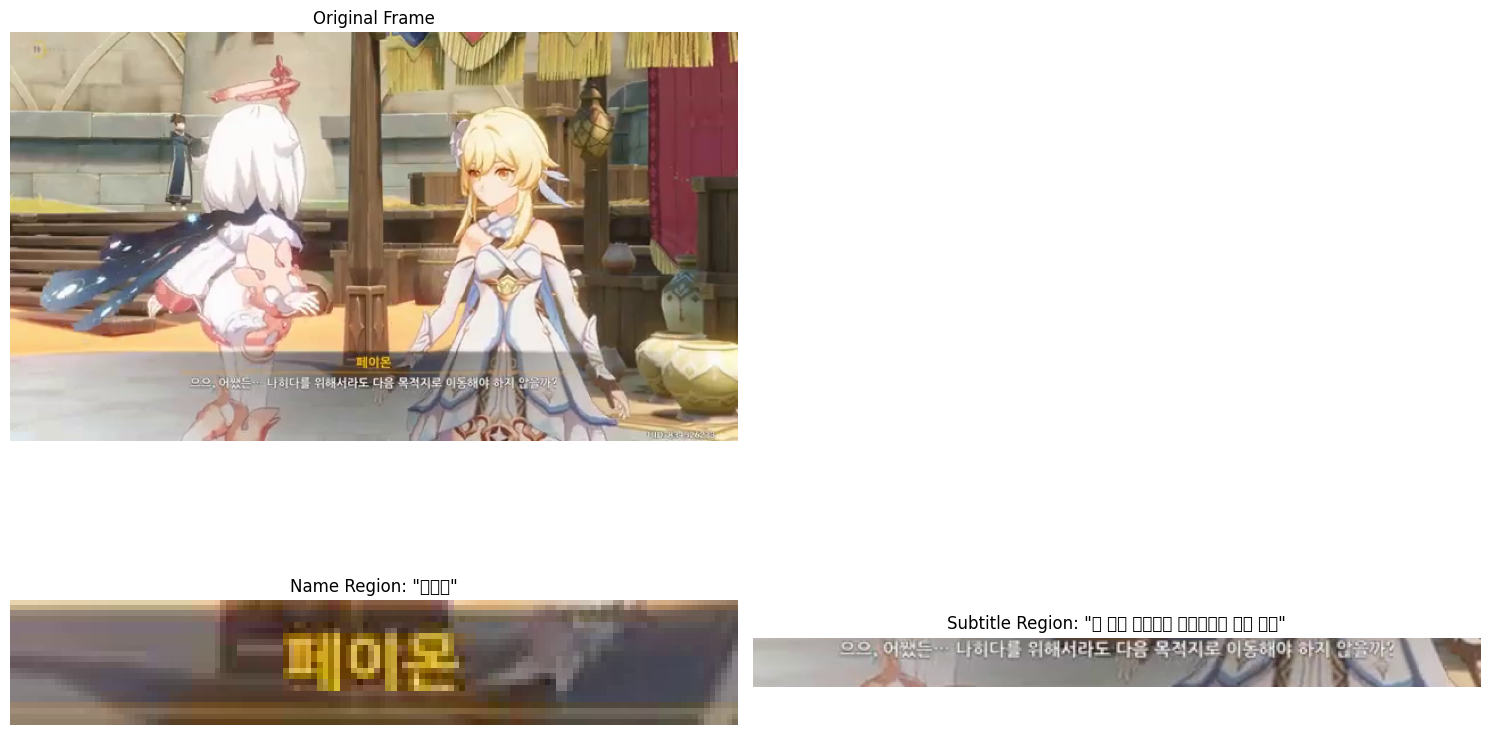

[59.00s] 페이몬: 으 어든 나히다는 위해서라도 화둥 하지
Results saved to dialogue.json


In [19]:
from difflib import SequenceMatcher
import Levenshtein
import torch
import numpy as np
import cv2
from paddleocr import PaddleOCR
import json
import os
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from difflib import get_close_matches

class SubtitleRecognizer:
    def __init__(self):
        self.ocr = PaddleOCR(
            use_angle_cls=True,
            lang='korean',
            show_log=False
        )

        # 이름 사전 정의
        self.name_vocabulary = [
            "페이몬", "루미네", "데히야", "푸리나",
            "느비예트", "리니", "리넷", "샤를로트"
        ]

    def preprocess_region(self, region: np.ndarray) -> np.ndarray:
        """이미지 영역 전처리"""
        # 크기 조정
        region = cv2.resize(region, None, fx=2.0, fy=2.0)

        # 대비 향상
        lab = cv2.cvtColor(region, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        enhanced = cv2.merge((cl,a,b))
        enhanced = cv2.cvtColor(enhanced, cv2.COLOR_LAB2BGR)

        return enhanced

    def extract_regions(self, frame: np.ndarray) -> tuple:
        """이름과 자막 영역 추출"""
        height, width = frame.shape[:2]

        # 이름 영역 추출
        name_region = frame[int(height*0.78):int(height*0.84),
                          int(width*0.4):int(width*0.6)]

        # 자막 영역 추출
        subtitle_region = frame[int(height*0.84):int(height*0.92),
                              int(width*0.17):int(width*0.83)]

        return name_region, subtitle_region

    def find_closest_name(self, detected_text: str) -> str:
        """가장 유사한 이름 찾기"""
        if not detected_text:
            return ""

        # 문자열 유사도를 기반으로 가장 가까운 이름 찾기
        matches = get_close_matches(detected_text, self.name_vocabulary, n=1, cutoff=0.6)

        return matches[0] if matches else ""

    def recognize_text(self, region: np.ndarray, is_name: bool = False) -> str:
        """텍스트 인식"""
        # 전처리
        processed_region = self.preprocess_region(region)

        # OCR 수행
        result = self.ocr.ocr(processed_region, cls=True)

        if not result or not result[0]:
            return ""

        # 인식된 모든 텍스트 결합
        texts = []
        for line in result[0]:
            text = line[1][0]  # OCR 결과에서 텍스트 추출
            confidence = line[1][1]  # 신뢰도
            if confidence > 0.5:  # 신뢰도가 50% 이상인 것만 사용
                texts.append(text)

        detected_text = " ".join(texts)

        # 이름 영역인 경우 vocabulary에서 가장 가까운 이름 찾기
        if is_name:
            return self.find_closest_name(detected_text)

        return detected_text

    def recognize_dialogue(self, frame: np.ndarray) -> tuple:
        """대화 인식"""
        # 영역 추출
        name_region, subtitle_region = self.extract_regions(frame)

        # 각 영역 텍스트 인식
        name = self.recognize_text(name_region, is_name=True)  # 이름 인식
        subtitle = self.recognize_text(subtitle_region)  # 자막 인식

        return name.strip(), subtitle.strip()

    def visualize_recognition(self, frame: np.ndarray, name: str, subtitle: str):
        """인식 결과 시각화"""
        name_region, subtitle_region = self.extract_regions(frame)

        plt.figure(figsize=(15, 10))

        # 원본 프레임
        plt.subplot(221)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Original Frame')
        plt.axis('off')

        # 이름 영역
        plt.subplot(223)
        plt.imshow(cv2.cvtColor(name_region, cv2.COLOR_BGR2RGB))
        plt.title(f'Name Region: "{name}"')
        plt.axis('off')

        # 자막 영역
        plt.subplot(224)
        plt.imshow(cv2.cvtColor(subtitle_region, cv2.COLOR_BGR2RGB))
        plt.title(f'Subtitle Region: "{subtitle}"')
        plt.axis('off')

        plt.tight_layout()
        display(plt.gcf())
        plt.close()

class DialogueFilter:
    def __init__(self, similarity_threshold=0.7, time_window=2.0):
        self.prev_dialogues = []  # 최근 대화 저장
        self.similarity_threshold = similarity_threshold  # 유사도 임계값
        self.time_window = time_window  # 시간 윈도우 (초)

    def calculate_similarity(self, text1: str, text2: str) -> float:
        """두 텍스트 간의 유사도 계산"""
        # Levenshtein 거리 기반 유사도
        max_len = max(len(text1), len(text2))
        if max_len == 0:
            return 0
        distance = Levenshtein.distance(text1, text2)
        similarity = 1 - (distance / max_len)

        # SequenceMatcher를 통한 추가 검증
        sequence_similarity = SequenceMatcher(None, text1, text2).ratio()

        # 두 유사도의 평균 반환
        return (similarity + sequence_similarity) / 2

    def is_similar_dialogue(self, current_dialogue: dict) -> bool:
        """현재 대화가 이전 대화들과 유사한지 확인"""
        current_time = current_dialogue['timestamp']
        current_text = current_dialogue['subtitle']

        # 시간 윈도우 내의 대화들만 필터링
        recent_dialogues = [
            d for d in self.prev_dialogues
            if current_time - d['timestamp'] <= self.time_window
        ]

        for prev_dialogue in recent_dialogues:
            similarity = self.calculate_similarity(
                current_text,
                prev_dialogue['subtitle']
            )

            if similarity >= self.similarity_threshold:
                # 유사한 대화를 발견한 경우, 더 긴 텍스트를 선택
                if len(current_text) > len(prev_dialogue['subtitle']):
                    # 이전 대화 제거 후 현재 대화 추가
                    self.prev_dialogues.remove(prev_dialogue)
                    return False
                return True

        return False

    def add_dialogue(self, dialogue: dict) -> None:
        """대화 추가"""
        self.prev_dialogues.append(dialogue)

        # 오래된 대화 제거
        current_time = dialogue['timestamp']
        self.prev_dialogues = [
            d for d in self.prev_dialogues
            if current_time - d['timestamp'] <= self.time_window
        ]

def extract_subtitles(video_path: str, output_path: str):
    """비디오에서 자막 추출"""
    if not os.path.exists(video_path):
        raise FileNotFoundError(f"비디오 파일을 찾을 수 없습니다: {video_path}")

    extractor = SubtitleRecognizer()
    dialogue_filter = DialogueFilter()
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        raise ValueError(f"비디오 파일을 열 수 없습니다: {video_path}")

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Processing video: {fps} FPS, {frame_count} frames")
    print(f"Video duration: {frame_count/fps:.2f} seconds")

    dialogue_list = []
    frame_interval = 30

    for frame_idx in range(0, frame_count, frame_interval):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if not ret:
            print(f"Warning: Failed to read frame at index {frame_idx}")
            continue

        try:
            # 대화 인식
            name, subtitle = extractor.recognize_dialogue(frame)

            # 유효한 대화인 경우만 처리
            if subtitle:
                timestamp = frame_idx / fps
                current_dialogue = {
                    'timestamp': timestamp,
                    'name': name,
                    'subtitle': subtitle,
                    'dialogue': f"{name}: {subtitle}" if name else subtitle
                }

                # 유사한 대화가 없는 경우만 추가
                if not dialogue_filter.is_similar_dialogue(current_dialogue):
                    dialogue_filter.add_dialogue(current_dialogue)
                    dialogue_list.append(current_dialogue)

                    # 결과 시각화
                    clear_output(wait=True)
                    extractor.visualize_recognition(frame, name, subtitle)
                    print(f"[{timestamp:.2f}s] {current_dialogue['dialogue']}")

        except Exception as e:
            print(f"Error processing frame {frame_idx}: {str(e)}")
            continue

    cap.release()

    if not dialogue_list:
        print("Warning: No dialogues were detected in the video")

    # 결과 저장
    try:
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(dialogue_list, f, ensure_ascii=False, indent=2)
        print(f"Results saved to {output_path}")
    except Exception as e:
        print(f"Error saving results: {str(e)}")

    return dialogue_list

if __name__ == "__main__":
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    output_path = "dialogue.json"

    try:
        print(f"Processing video file: {video_path}")
        dialogue_list = extract_subtitles(video_path, output_path)
    except Exception as e:
        print(f"Error: {str(e)}")

In [20]:
!pip install openai-whisper moviepy pydub torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.9 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803321 sha256=9e16aa58e83eea67c6b1a8ad19208d870ac779aa37593592e272b5bfe811fcf0
  Stored in directory: /root/.cache/pip/wheels/dd/4a/1f/d1c4bf3b9133c8168fe617ed979cab7b14fe381d059ffb9d83
Successfully built openai-whisper


In [22]:
import whisper
import torch
import numpy as np
from moviepy.editor import VideoFileClip
import json
import os
from pydub import AudioSegment
import tempfile

class AudioSubtitleExtractor:
    def __init__(self, model_size="medium"):
        """
        초기화 함수
        Args:
            model_size (str): whisper 모델 크기 ("tiny", "base", "small", "medium", "large")
        """
        # GPU 사용 가능 여부 확인
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Using device: {self.device}")

        # Whisper 모델 로드
        try:
            self.model = whisper.load_model(model_size).to(self.device)
            print(f"Loaded Whisper model: {model_size}")
        except Exception as e:
            raise Exception(f"Failed to load Whisper model: {str(e)}")

    def extract_audio(self, video_path: str) -> str:
        """
        비디오에서 오디오 추출
        Args:
            video_path (str): 비디오 파일 경로
        Returns:
            str: 임시 오디오 파일 경로
        """
        try:
            # 임시 파일 생성
            temp_audio = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
            temp_audio_path = temp_audio.name
            temp_audio.close()

            # 비디오에서 오디오 추출
            video = VideoFileClip(video_path)
            video.audio.write_audiofile(temp_audio_path,
                                      codec='pcm_s16le',  # WAV 포맷용 코덱
                                      verbose=False,
                                      logger=None)
            video.close()

            return temp_audio_path

        except Exception as e:
            raise Exception(f"Failed to extract audio: {str(e)}")

    def process_audio(self, audio_path: str, language="ko") -> list:
        """
        오디오 파일 처리 및 자막 추출
        Args:
            audio_path (str): 오디오 파일 경로
            language (str): 언어 코드 (기본값: "ko" for Korean)
        Returns:
            list: 자막 정보 리스트
        """
        try:
            # Whisper로 음성 인식 수행
            result = self.model.transcribe(
                audio_path,
                language=language,
                task="transcribe",
                initial_prompt="이것은 게임 대화입니다.",
                word_timestamps=True
            )

            # 결과 포맷팅
            subtitles = []
            for segment in result["segments"]:
                subtitle = {
                    "timestamp": segment["start"],
                    "end_time": segment["end"],
                    "subtitle": segment["text"].strip(),
                    "confidence": segment["confidence"]
                }
                subtitles.append(subtitle)

            return subtitles

        except Exception as e:
            raise Exception(f"Failed to process audio: {str(e)}")

    def extract_subtitles(self, video_path: str, output_path: str, language="ko") -> list:
        """
        비디오에서 자막 추출 메인 함수
        Args:
            video_path (str): 비디오 파일 경로
            output_path (str): 출력 JSON 파일 경로
            language (str): 언어 코드
        Returns:
            list: 자막 정보 리스트
        """
        try:
            print(f"Processing video: {video_path}")

            # 오디오 추출
            audio_path = self.extract_audio(video_path)
            print("Audio extracted successfully")

            # 자막 추출
            subtitles = self.process_audio(audio_path, language)
            print(f"Extracted {len(subtitles)} subtitle segments")

            # 결과 저장
            with open(output_path, 'w', encoding='utf-8') as f:
                json.dump(subtitles, f, ensure_ascii=False, indent=2)
            print(f"Results saved to {output_path}")

            # 임시 파일 삭제
            try:
                os.remove(audio_path)
            except:
                pass

            return subtitles

        except Exception as e:
            print(f"Error: {str(e)}")
            return []

def main():
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    output_path = "audio_subtitles.json"

    # 자막 추출기 초기화 및 실행
    extractor = AudioSubtitleExtractor(model_size="medium")
    subtitles = extractor.extract_subtitles(video_path, output_path)

    # 결과 출력
    for subtitle in subtitles:
        print(f"[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}] "
              f"{subtitle['subtitle']} (confidence: {subtitle['confidence']:.2f})")

if __name__ == "__main__":
    main()

Using device: cuda
Loaded Whisper model: medium
Processing video: /content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4
Audio extracted successfully
Error: Failed to process audio: 'confidence'


In [23]:
import whisper
import torch
import numpy as np
from moviepy.editor import VideoFileClip
import json
import os
from pydub import AudioSegment
import tempfile

class AudioSubtitleExtractor:
    def __init__(self, model_size="medium"):
        """
        초기화 함수
        Args:
            model_size (str): whisper 모델 크기 ("tiny", "base", "small", "medium", "large")
        """
        # GPU 사용 가능 여부 확인
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Using device: {self.device}")

        # Whisper 모델 로드
        try:
            self.model = whisper.load_model(model_size).to(self.device)
            print(f"Loaded Whisper model: {model_size}")
        except Exception as e:
            raise Exception(f"Failed to load Whisper model: {str(e)}")

    def extract_audio(self, video_path: str) -> str:
        """
        비디오에서 오디오 추출
        Args:
            video_path (str): 비디오 파일 경로
        Returns:
            str: 임시 오디오 파일 경로
        """
        try:
            # 임시 파일 생성
            temp_audio = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
            temp_audio_path = temp_audio.name
            temp_audio.close()

            # 비디오에서 오디오 추출
            video = VideoFileClip(video_path)
            video.audio.write_audiofile(temp_audio_path,
                                      codec='pcm_s16le',  # WAV 포맷용 코덱
                                      verbose=False,
                                      logger=None)
            video.close()

            return temp_audio_path

        except Exception as e:
            raise Exception(f"Failed to extract audio: {str(e)}")

    def process_audio(self, audio_path: str, language="ko") -> list:
        """
        오디오 파일 처리 및 자막 추출
        Args:
            audio_path (str): 오디오 파일 경로
            language (str): 언어 코드 (기본값: "ko" for Korean)
        Returns:
            list: 자막 정보 리스트
        """
        try:
            # Whisper로 음성 인식 수행
            result = self.model.transcribe(
                audio_path,
                language=language,
                task="transcribe",
                initial_prompt="이것은 게임 대화입니다.",
                word_timestamps=True
            )

            # 결과 포맷팅
            subtitles = []
            for segment in result["segments"]:
                subtitle = {
                    "timestamp": segment["start"],
                    "end_time": segment["end"],
                    "subtitle": segment["text"].strip(),
                    "speaker": "",  # 화자 구분이 필요한 경우 여기에 추가
                    "words": [
                        {
                            "word": word["word"],
                            "start": word["start"],
                            "end": word["end"],
                            "probability": word.get("probability", 0.0)
                        }
                        for word in segment.get("words", [])
                    ] if "words" in segment else []
                }
                subtitles.append(subtitle)

            return subtitles

        except Exception as e:
            import traceback
            print(traceback.format_exc())
            raise Exception(f"Failed to process audio: {str(e)}")

    def extract_subtitles(self, video_path: str, output_path: str, language="ko") -> list:
        """
        비디오에서 자막 추출 메인 함수
        Args:
            video_path (str): 비디오 파일 경로
            output_path (str): 출력 JSON 파일 경로
            language (str): 언어 코드
        Returns:
            list: 자막 정보 리스트
        """
        try:
            print(f"Processing video: {video_path}")

            # 오디오 추출
            audio_path = self.extract_audio(video_path)
            print("Audio extracted successfully")

            # 자막 추출
            subtitles = self.process_audio(audio_path, language)
            print(f"Extracted {len(subtitles)} subtitle segments")

            # 결과 저장
            with open(output_path, 'w', encoding='utf-8') as f:
                json.dump(subtitles, f, ensure_ascii=False, indent=2)
            print(f"Results saved to {output_path}")

            # 임시 파일 삭제
            try:
                os.remove(audio_path)
            except:
                pass

            return subtitles

        except Exception as e:
            print(f"Error: {str(e)}")
            return []

def main():
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    output_path = "audio_subtitles.json"

    # 자막 추출기 초기화 및 실행
    extractor = AudioSubtitleExtractor(model_size="medium")
    subtitles = extractor.extract_subtitles(video_path, output_path)

    # 결과 출력
    for subtitle in subtitles:
        print(f"[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}] {subtitle['subtitle']}")
        if subtitle["words"]:
            print("Words:")
            for word in subtitle["words"]:
                print(f"  {word['word']}: {word['start']:.2f} - {word['end']:.2f} "
                      f"(prob: {word['probability']:.2f})")
        print()

if __name__ == "__main__":
    main()

Using device: cuda
Loaded Whisper model: medium
Processing video: /content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4
Audio extracted successfully
Extracted 8 subtitle segments
Results saved to audio_subtitles.json
[0.00 - 4.36] 하... 우리가 카라반 수도원에는 맨 처음에 무슨 일을 왔었더라?
Words:
   하...: 0.00 - 0.92 (prob: 0.19)
   우리가: 0.92 - 1.30 (prob: 0.84)
   카라반: 1.30 - 1.80 (prob: 0.96)
   수도원에는: 1.80 - 2.40 (prob: 0.95)
   맨: 2.40 - 2.74 (prob: 0.99)
   처음에: 2.74 - 3.12 (prob: 0.95)
   무슨: 3.12 - 3.38 (prob: 0.99)
   일을: 3.38 - 3.64 (prob: 0.63)
   왔었더라?: 3.64 - 4.36 (prob: 0.97)

[5.20 - 12.08] 아, 맞아! 라이다의 의식이 도토레한테 묶였을 때 사막으로 가서 도움을 청하라는 암시를 남겼었지?
Words:
   아,: 5.20 - 5.20 (prob: 0.71)
   맞아!: 5.44 - 5.82 (prob: 0.97)
   라이다의: 6.30 - 6.66 (prob: 0.88)
   의식이: 6.66 - 7.12 (prob: 1.00)
   도토레한테: 7.12 - 7.72 (prob: 0.97)
   묶였을: 7.72 - 8.34 (prob: 0.96)
   때: 8.34 - 8.68 (prob: 0.97)
   사막으로: 8.68 - 9.20 (prob: 0.91)
   가서: 9.20 - 9.42 (prob: 0.99)
   도움을: 9.

In [25]:
import whisper
import torch
import numpy as np
from moviepy.editor import VideoFileClip
import json
import os
from pydub import AudioSegment
import tempfile

class AudioSubtitleExtractor:
    def __init__(self, model_size="medium"):
        """
        초기화 함수
        Args:
            model_size (str): whisper 모델 크기 ("tiny", "base", "small", "medium", "large")
        """
        # 어휘 사전 정의
        self.vocabulary = [
            # 캐릭터 이름
            "페이몬", "루미네", "데히야", "푸리나",
            "느비예트", "리니", "리넷", "샤를로트",
            "나히다", "도토레", "알하이탐", "캔디스", "사이노",

            # 지역 이름
            "수메르", "폰타인", "리월", "몬드", "이나즈마"
        ]

        # 초기 프롬프트 생성
        self.initial_prompt = (
            "이것은 원신 게임의 대화입니다. "
            f"다음 단어들이 자주 등장합니다: {', '.join(self.vocabulary)}. "
            "대화는 주로 게임 캐릭터들 간의 상호작용으로 이루어져 있습니다."
        )

        # GPU 사용 가능 여부 확인
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Using device: {self.device}")

        # Whisper 모델 로드
        try:
            self.model = whisper.load_model(model_size).to(self.device)
            print(f"Loaded Whisper model: {model_size}")
        except Exception as e:
            raise Exception(f"Failed to load Whisper model: {str(e)}")

    def extract_audio(self, video_path: str) -> str:
        """
        비디오에서 오디오 추출
        Args:
            video_path (str): 비디오 파일 경로
        Returns:
            str: 임시 오디오 파일 경로
        """
        try:
            # 임시 파일 생성
            temp_audio = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
            temp_audio_path = temp_audio.name
            temp_audio.close()

            # 비디오에서 오디오 추출
            video = VideoFileClip(video_path)
            video.audio.write_audiofile(temp_audio_path,
                                      codec='pcm_s16le',  # WAV 포맷용 코덱
                                      verbose=False,
                                      logger=None)
            video.close()

            return temp_audio_path

        except Exception as e:
            raise Exception(f"Failed to extract audio: {str(e)}")

    def process_audio(self, audio_path: str, language="ko") -> list:
        """
        오디오 파일 처리 및 자막 추출
        Args:
            audio_path (str): 오디오 파일 경로
            language (str): 언어 코드 (기본값: "ko" for Korean)
        Returns:
            list: 자막 정보 리스트
        """
        try:
            # Whisper로 음성 인식 수행
            result = self.model.transcribe(
                audio_path,
                language=language,
                task="transcribe",
                initial_prompt=self.initial_prompt,
                word_timestamps=True
            )

            # 결과 포맷팅
            subtitles = []
            for segment in result["segments"]:
                subtitle = {
                    "timestamp": segment["start"],
                    "end_time": segment["end"],
                    "text": segment["text"].strip(),
                    "speaker": "",  # 화자 구분이 필요한 경우 추가
                    "words": [
                        {
                            "word": word["word"],
                            "start": word["start"],
                            "end": word["end"],
                            "probability": word.get("probability", 0.0)
                        }
                        for word in segment.get("words", [])
                    ] if "words" in segment else []
                }
                subtitles.append(subtitle)

            return subtitles

        except Exception as e:
            import traceback
            print(traceback.format_exc())
            raise Exception(f"Failed to process audio: {str(e)}")

    def extract_subtitles(self, video_path: str, output_path: str, language="ko") -> list:
        """
        비디오에서 자막 추출 메인 함수
        Args:
            video_path (str): 비디오 파일 경로
            output_path (str): 출력 JSON 파일 경로
            language (str): 언어 코드
        Returns:
            list: 자막 정보 리스트
        """
        try:
            print(f"Processing video: {video_path}")

            # 오디오 추출
            audio_path = self.extract_audio(video_path)
            print("Audio extracted successfully")

            # 자막 추출
            subtitles = self.process_audio(audio_path, language)
            print(f"Extracted {len(subtitles)} subtitle segments")

            # 결과 저장
            with open(output_path, 'w', encoding='utf-8') as f:
                json.dump(subtitles, f, ensure_ascii=False, indent=2)
            print(f"Results saved to {output_path}")

            # 임시 파일 삭제
            try:
                os.remove(audio_path)
            except:
                pass

            return subtitles

        except Exception as e:
            print(f"Error: {str(e)}")
            return []

def main():
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    output_path = "audio_subtitles.json"

    # 자막 추출기 초기화 및 실행
    extractor = AudioSubtitleExtractor(model_size="medium")
    subtitles = extractor.extract_subtitles(video_path, output_path)

    # 결과 출력
    for subtitle in subtitles:
        print("\nTimestamp:", f"[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}]")
        print("Text:", subtitle['text'])
        if subtitle["words"]:
            print("Words:")
            for word in subtitle["words"]:
                print(f"  {word['word']}: {word['start']:.2f} - {word['end']:.2f} "
                      f"(prob: {word['probability']:.2f})")

if __name__ == "__main__":
    main()

Using device: cuda
Loaded Whisper model: medium
Processing video: /content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4
Audio extracted successfully
Extracted 8 subtitle segments
Results saved to audio_subtitles.json

Timestamp: [0.00 - 4.36]
Text: 아, 우리가 카라반 수도원에는 맨 처음에 무슨 일을 왔었더라?
Words:
   아,: 0.00 - 0.48 (prob: 0.08)
   우리가: 0.94 - 1.28 (prob: 0.11)
   카라반: 1.28 - 1.80 (prob: 0.96)
   수도원에는: 1.80 - 2.40 (prob: 0.94)
   맨: 2.40 - 2.74 (prob: 0.98)
   처음에: 2.74 - 3.12 (prob: 0.95)
   무슨: 3.12 - 3.38 (prob: 0.99)
   일을: 3.38 - 3.62 (prob: 0.61)
   왔었더라?: 3.62 - 4.36 (prob: 0.96)

Timestamp: [5.18 - 12.08]
Text: 아, 맞아! 나히다의 의식이 도토레한테 묶였을 때 사막으로 가서 도움을 청하라는 암시를 남겼었지?
Words:
   아,: 5.18 - 5.20 (prob: 0.71)
   맞아!: 5.44 - 5.84 (prob: 0.97)
   나히다의: 6.28 - 6.66 (prob: 0.51)
   의식이: 6.66 - 7.10 (prob: 1.00)
   도토레한테: 7.10 - 7.72 (prob: 0.96)
   묶였을: 7.72 - 8.34 (prob: 0.96)
   때: 8.34 - 8.68 (prob: 0.97)
   사막으로: 8.68 - 9.20 (prob: 0.91)
   가서: 9.20

In [26]:
import json
import cv2
import numpy as np
from typing import List, Dict

class SubtitleCombiner:
    def __init__(self, video_path: str, audio_subtitles_path: str):
        """
        자막 통합기 초기화
        Args:
            video_path (str): 비디오 파일 경로
            audio_subtitles_path (str): 오디오 기반 자막 JSON 파일 경로
        """
        self.video_path = video_path
        self.frame_recognizer = SubtitleRecognizer()
        self.dialogue_filter = DialogueFilter()

        # 오디오 자막 로드
        with open(audio_subtitles_path, 'r', encoding='utf-8') as f:
            self.audio_subtitles = json.load(f)

    def get_frames_for_segment(self, start_time: float, end_time: float,
                             interval: float = 1.0) -> List[np.ndarray]:
        """
        특정 시간 구간의 프레임들 추출
        Args:
            start_time (float): 시작 시간(초)
            end_time (float): 종료 시간(초)
            interval (float): 프레임 추출 간격(초)
        Returns:
            List[np.ndarray]: 프레임 리스트
        """
        cap = cv2.VideoCapture(self.video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)

        frames = []
        timestamps = []

        for time in np.arange(start_time, end_time, interval):
            frame_idx = int(time * fps)
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()

            if ret:
                frames.append(frame)
                timestamps.append(time)

        cap.release()
        return frames, timestamps

    def process_segment(self, segment: Dict) -> Dict:
        """
        하나의 자막 세그먼트 처리
        Args:
            segment (Dict): 오디오 자막 세그먼트
        Returns:
            Dict: 통합된 자막 정보
        """
        start_time = segment["timestamp"]
        end_time = segment["end_time"]
        audio_text = segment["text"]

        frames, timestamps = self.get_frames_for_segment(start_time, end_time)

        frame_texts = []
        names = []

        # 각 프레임에서 텍스트 인식
        for frame, timestamp in zip(frames, timestamps):
            name, text = self.frame_recognizer.recognize_dialogue(frame)
            if text:  # 텍스트가 인식된 경우만 저장
                frame_texts.append({
                    'timestamp': timestamp,
                    'text': text
                })
            if name:  # 이름이 인식된 경우만 저장
                names.append(name)

        # 가장 많이 등장한 이름 선택
        most_common_name = max(set(names), key=names.count) if names else ""

        # 프레임 기반 텍스트들 중 가장 긴 텍스트 선택
        longest_frame_text = max(frame_texts, key=lambda x: len(x['text']))['text'] if frame_texts else ""

        # 텍스트 통합
        final_text = audio_text
        if longest_frame_text and len(longest_frame_text) > len(audio_text):
            # Levenshtein 거리로 유사도 체크
            similarity = 1 - Levenshtein.distance(audio_text, longest_frame_text) / max(len(audio_text), len(longest_frame_text))
            if similarity < 0.7:  # 유사도가 낮으면 둘 다 저장
                final_text = f"{audio_text} (OCR: {longest_frame_text})"

        return {
            "timestamp": start_time,
            "end_time": end_time,
            "text": final_text,
            "name": most_common_name,
            "frame_texts": frame_texts,  # 디버깅용 프레임별 인식 결과
            "audio_text": audio_text  # 원본 오디오 인식 결과
        }

    def combine_subtitles(self, output_path: str):
        """
        자막 통합 및 저장
        Args:
            output_path (str): 출력 파일 경로
        """
        combined_subtitles = []

        print("Processing segments...")
        total_segments = len(self.audio_subtitles)

        for i, segment in enumerate(self.audio_subtitles, 1):
            print(f"\rProcessing segment {i}/{total_segments}...", end="")

            try:
                combined_segment = self.process_segment(segment)
                combined_subtitles.append(combined_segment)

                # 진행 상황 시각화 (선택적)
                self.frame_recognizer.visualize_recognition(
                    combined_segment.get('last_frame'),
                    combined_segment['name'],
                    combined_segment['text']
                )

            except Exception as e:
                print(f"\nError processing segment {i}: {str(e)}")
                continue

        print("\nSaving results...")
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(combined_subtitles, f, ensure_ascii=False, indent=2)

        print(f"Results saved to {output_path}")
        return combined_subtitles

def main():
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    audio_subtitles_path = "/content/audio_subtitles.json"
    output_path = "combined_subtitles.json"

    combiner = SubtitleCombiner(video_path, audio_subtitles_path)
    combined_subtitles = combiner.combine_subtitles(output_path)

    # 결과 출력
    for subtitle in combined_subtitles:
        print(f"\n[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}]")
        if subtitle['name']:
            print(f"Speaker: {subtitle['name']}")
        print(f"Text: {subtitle['text']}")

if __name__ == "__main__":
    main()

[2024/11/12 03:54:59] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/11/12 03:55:00] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/11/12 03:55:04] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
Processing segments...
Processing segment 1/8...
Error processing segment 1: 'NoneType' object has no attribute 'shape'
Processing segment 2/8...
Error processing segment 2: 'NoneType' object has no attribute 'shape'
Processing segment 3/8...
Error processing segment 3: 'NoneType' object has no attribute 'shape'
Processing segment 4/8...
Error processing segment 4: 'NoneType' object has no attribute 'shape'
Processing segment 5/8...
Error processing segment 5: 'NoneType' object has no attribute 'shape'
Processing segment 6/8...
Error processing segment 6: 'NoneType' object has no attribute 'shape'
Processing segment 7/8...
Error processing segment 7: 'NoneType' object has no attribute 'shape'
Processing se

In [27]:
import json
import cv2
import numpy as np
from typing import List, Dict

class SubtitleCombiner:
    def __init__(self, video_path: str, audio_subtitles_path: str):
        """
        자막 통합기 초기화
        Args:
            video_path (str): 비디오 파일 경로
            audio_subtitles_path (str): 오디오 기반 자막 JSON 파일 경로
        """
        self.video_path = video_path
        self.frame_recognizer = SubtitleRecognizer()

        # 이름 사전 업데이트
        self.frame_recognizer.name_vocabulary = [
            "페이몬", "루미네", "데히야", "푸리나",
            "느비예트", "리니", "리넷", "샤를로트",
            "나히다", "도토레", "알하이탐", "캔디스", "사이노"
        ]

        # 오디오 자막 로드
        with open(audio_subtitles_path, 'r', encoding='utf-8') as f:
            self.audio_subtitles = json.load(f)

    def get_frame_at_time(self, timestamp: float) -> np.ndarray:
        """
        특정 시간의 프레임 추출
        Args:
            timestamp (float): 시간(초)
        Returns:
            np.ndarray: 프레임
        """
        cap = cv2.VideoCapture(self.video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)

        frame_idx = int(timestamp * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        cap.release()
        return frame if ret else None

    def process_segment(self, segment: Dict) -> Dict:
        """
        하나의 자막 세그먼트 처리
        Args:
            segment (Dict): 오디오 자막 세그먼트
        Returns:
            Dict: 통합된 자막 정보
        """
        start_time = segment["timestamp"]
        audio_text = segment["text"]

        # 세그먼트 시작 시점의 프레임에서 이름만 인식
        frame = self.get_frame_at_time(start_time)
        if frame is not None:
            name, _ = self.frame_recognizer.recognize_dialogue(frame)
        else:
            name = ""

        return {
            "timestamp": segment["timestamp"],
            "end_time": segment["end_time"],
            "text": audio_text,
            "name": name.strip(),
            "dialogue": f"{name}: {audio_text}" if name else audio_text
        }

    def combine_subtitles(self, output_path: str):
        """
        자막 통합 및 저장
        Args:
            output_path (str): 출력 파일 경로
        """
        combined_subtitles = []

        print("Processing segments...")
        total_segments = len(self.audio_subtitles)

        for i, segment in enumerate(self.audio_subtitles, 1):
            print(f"\rProcessing segment {i}/{total_segments}...", end="")

            try:
                combined_segment = self.process_segment(segment)
                combined_subtitles.append(combined_segment)

            except Exception as e:
                print(f"\nError processing segment {i}: {str(e)}")
                continue

        print("\nSaving results...")
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(combined_subtitles, f, ensure_ascii=False, indent=2)

        print(f"Results saved to {output_path}")
        return combined_subtitles

def main():
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    audio_subtitles_path = "/content/audio_subtitles.json"
    output_path = "combined_subtitles.json"

    combiner = SubtitleCombiner(video_path, audio_subtitles_path)
    combined_subtitles = combiner.combine_subtitles(output_path)

    # 결과 출력
    for subtitle in combined_subtitles:
        print(f"\n[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}]")
        print(f"{subtitle['dialogue']}")

if __name__ == "__main__":
    main()

[2024/11/12 03:59:03] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/11/12 03:59:04] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/11/12 03:59:08] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
Processing segments...
Processing segment 8/8...
Saving results...
Results saved to combined_subtitles.json

[0.00 - 4.36]
아, 우리가 카라반 수도원에는 맨 처음에 무슨 일을 왔었더라?

[5.18 - 12.08]
페이몬: 아, 맞아! 나히다의 의식이 도토레한테 묶였을 때 사막으로 가서 도움을 청하라는 암시를 남겼었지?

[12.90 - 19.24]
그 후로 벌써 많은 시간이 지났어. 나히다가 통치한 뒤부터 수메르가 점점 나아지고 있는 것 같아.

[20.00 - 26.18]
페이몬: 나히다한테 더 이상 문제가 안 생기게 계속 이렇게 평화로웠으면 좋겠네.

[26.18 - 34.24]
페이몬: 응, 하긴. 우린 항상 사건의 중심에 있었으니까. 또 무슨 일이 일어날지는 아무도 모르지.

[34.60 - 41.04]
페이몬: 근데 말이지, 니 체질이 그냥 그런 거 아닐까? 니가 문제를 몰고 다니는 거 아니야?

[43.62 - 52.48]
페이몬: 뭐? 널 만나기 전엔 이렇지 않았거든? 문제라고 해봤자 힘이 다 빠진 상태에서 이상한 소용돌이에 휘말린 게 다라고.

[52.48 - 60.00]
그렇게 바다에 빠졌다가 니가 낚아올려줬고, 어쨌든 나히다를 위해서...


In [31]:
import json
import cv2
import numpy as np
from typing import List, Dict

class SubtitleCombiner:
    def __init__(self, video_path: str, audio_subtitles_path: str):
        """
        자막 통합기 초기화
        Args:
            video_path (str): 비디오 파일 경로
            audio_subtitles_path (str): 오디오 기반 자막 JSON 파일 경로
        """
        self.video_path = video_path
        self.frame_recognizer = SubtitleRecognizer()
        self.previous_name = ""  # 이전 화자 이름 저장

        # 이름 사전 업데이트
        self.frame_recognizer.name_vocabulary = [
            "페이몬", "루미네", "데히야", "푸리나",
            "느비예트", "리니", "리넷", "샤를로트",
            "나히다", "도토레", "알하이탐", "캔디스", "사이노"
        ]

        # 오디오 자막 로드
        with open(audio_subtitles_path, 'r', encoding='utf-8') as f:
            self.audio_subtitles = json.load(f)

    def extract_speaker_from_text(self, text: str) -> tuple:
        """
        텍스트에서 화자와 대사 분리
        Args:
            text (str): 전체 텍스트
        Returns:
            tuple: (화자 이름, 대사)
        """
        # ': ' 또는 ': ' 형태로 화자 구분
        if ': ' in text or ':' in text:
            parts = text.split(': ') if ': ' in text else text.split(':')
            if len(parts) >= 2:
                return parts[0], ': '.join(parts[1:])
        return None, text

    def get_frame_at_time(self, timestamp: float) -> np.ndarray:
        """
        특정 시간의 프레임 추출
        Args:
            timestamp (float): 시간(초)
        Returns:
            np.ndarray: 프레임
        """
        cap = cv2.VideoCapture(self.video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)

        frame_idx = int(timestamp * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        cap.release()
        return frame if ret else None

    def get_speaker_name(self, frame: np.ndarray, text: str) -> str:
        """
        화자 이름 결정
        Args:
            frame (np.ndarray): 비디오 프레임
            text (str): 자막 텍스트
        Returns:
            str: 화자 이름
        """
        # 먼저 텍스트에서 화자 확인
        text_speaker, _ = self.extract_speaker_from_text(text)
        if text_speaker:
            self.previous_name = text_speaker
            return text_speaker

        # 프레임에서 이름 인식
        if frame is not None:
            name, _ = self.frame_recognizer.recognize_dialogue(frame)
            if name:
                self.previous_name = name
                return name

        # 이전 화자 이름 사용
        return self.previous_name

    def process_segment(self, segment: Dict) -> Dict:
        """
        하나의 자막 세그먼트 처리
        Args:
            segment (Dict): 오디오 자막 세그먼트
        Returns:
            Dict: 통합된 자막 정보
        """
        start_time = segment["timestamp"]
        text = segment["text"]

        # 프레임에서 이름 인식
        frame = self.get_frame_at_time(start_time)
        name = self.get_speaker_name(frame, text)

        # 텍스트에서 화자 정보 제거
        _, clean_text = self.extract_speaker_from_text(text)

        return {
            "timestamp": segment["timestamp"],
            "end_time": segment["end_time"],
            "name": name,
            "text": clean_text,
            "dialogue": f"{name}: {clean_text}"
        }

    def combine_subtitles(self, output_path: str):
        """
        자막 통합 및 저장
        Args:
            output_path (str): 출력 파일 경로
        """
        combined_subtitles = []

        print("Processing segments...")
        total_segments = len(self.audio_subtitles)

        for i, segment in enumerate(self.audio_subtitles, 1):
            print(f"\rProcessing segment {i}/{total_segments}...", end="")

            try:
                combined_segment = self.process_segment(segment)
                combined_subtitles.append(combined_segment)

            except Exception as e:
                print(f"\nError processing segment {i}: {str(e)}")
                continue

        print("\nSaving results...")
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(combined_subtitles, f, ensure_ascii=False, indent=2)

        print(f"Results saved to {output_path}")
        return combined_subtitles

def main():
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    audio_subtitles_path = "/content/audio_subtitles.json"
    output_path = "combined_subtitles.json"
    dialogue_path = "dialogue.json"  # 새로운 출력 파일 경로

    # 자막 통합
    combiner = SubtitleCombiner(video_path, audio_subtitles_path)
    combined_subtitles = combiner.combine_subtitles(output_path)

    # 결과 출력
    for subtitle in combined_subtitles:
        print(f"\n[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}]")
        print(f"{subtitle['dialogue']}")

    # dialogue만 추출하여 리스트로 저장
    dialogues = [subtitle['dialogue'] for subtitle in combined_subtitles]

    # dialogue.json 파일로 저장
    try:
        with open(dialogue_path, 'w', encoding='utf-8') as f:
            json.dump(dialogues, f, ensure_ascii=False, indent=2)
        print(f"\nDialogues saved to {dialogue_path}")
    except Exception as e:
        print(f"\nError saving dialogues: {str(e)}")

    # 저장된 내용 확인
    print("\nSaved dialogues:")
    for dialogue in dialogues:
        print(dialogue)

if __name__ == "__main__":
    main()

[2024/11/12 04:08:38] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/11/12 04:08:39] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/11/12 04:08:43] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
Processing segments...
Processing segment 8/8...
Saving results...
Results saved to combined_subtitles.json

[0.00 - 4.36]
: 아, 우리가 카라반 수도원에는 맨 처음에 무슨 일을 왔었더라?

[5.18 - 12.08]
페이몬: 아, 맞아! 나히다의 의식이 도토레한테 묶였을 때 사막으로 가서 도움을 청하라는 암시를 남겼었지?

[12.90 - 19.24]
페이몬: 그 후로 벌써 많은 시간이 지났어. 나히다가 통치한 뒤부터 수메르가 점점 나아지고 있는 것 같아.

[20.00 - 26.18]
페이몬: 나히다한테 더 이상 문제가 안 생기게 계속 이렇게 평화로웠으면 좋겠네.

[26.18 - 34.24]
페이몬: 응, 하긴. 우린 항상 사건의 중심에 있었으니까. 또 무슨 일이 일어날지는 아무도 모르지.

[34.60 - 41.04]
페이몬: 근데 말이지, 니 체질이 그냥 그런 거 아닐까? 니가 문제를 몰고 다니는 거 아니야?

[43.62 - 52.48]
페이몬: 뭐? 널 만나기 전엔 이렇지 않았거든? 문제라고 해봤자 힘이 다 빠진 상태에서 이상한 소용돌이에 휘말린 게 다라고.

[52.48 - 60.00]
페이몬: 그렇게 바다에 빠졌다가 니가 낚아올려줬고, 어쨌든 나히다를 위해서...

Dialogues saved to dialogue.json

Saved dialogu

In [32]:
import json
import cv2
import numpy as np
from typing import List, Dict
from tqdm.notebook import tqdm  # Colab용 tqdm import

class SubtitleCombiner:
    def __init__(self, video_path: str, audio_subtitles_path: str):
        """
        자막 통합기 초기화
        Args:
            video_path (str): 비디오 파일 경로
            audio_subtitles_path (str): 오디오 기반 자막 JSON 파일 경로
        """
        self.video_path = video_path
        self.frame_recognizer = SubtitleRecognizer()
        self.previous_name = ""  # 이전 화자 이름 저장

        # 이름 사전 업데이트
        self.frame_recognizer.name_vocabulary = [
            "페이몬", "루미네", "데히야", "푸리나",
            "느비예트", "리니", "리넷", "샤를로트",
            "나히다", "도토레", "알하이탐", "캔디스", "사이노"
        ]

        # 오디오 자막 로드
        with open(audio_subtitles_path, 'r', encoding='utf-8') as f:
            self.audio_subtitles = json.load(f)

    def extract_speaker_from_text(self, text: str) -> tuple:
        """
        텍스트에서 화자와 대사 분리
        Args:
            text (str): 전체 텍스트
        Returns:
            tuple: (화자 이름, 대사)
        """
        # ': ' 또는 ': ' 형태로 화자 구분
        if ': ' in text or ':' in text:
            parts = text.split(': ') if ': ' in text else text.split(':')
            if len(parts) >= 2:
                return parts[0], ': '.join(parts[1:])
        return None, text

    def get_frame_at_time(self, timestamp: float) -> np.ndarray:
        """
        특정 시간의 프레임 추출
        Args:
            timestamp (float): 시간(초)
        Returns:
            np.ndarray: 프레임
        """
        cap = cv2.VideoCapture(self.video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)

        frame_idx = int(timestamp * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        cap.release()
        return frame if ret else None

    def get_speaker_name(self, frame: np.ndarray, text: str) -> str:
        """
        화자 이름 결정
        Args:
            frame (np.ndarray): 비디오 프레임
            text (str): 자막 텍스트
        Returns:
            str: 화자 이름
        """
        # 먼저 텍스트에서 화자 확인
        text_speaker, _ = self.extract_speaker_from_text(text)
        if text_speaker:
            self.previous_name = text_speaker
            return text_speaker

        # 프레임에서 이름 인식
        if frame is not None:
            name, _ = self.frame_recognizer.recognize_dialogue(frame)
            if name:
                self.previous_name = name
                return name

        # 이전 화자 이름 사용
        return self.previous_name

    def process_segment(self, segment: Dict) -> Dict:
        """
        하나의 자막 세그먼트 처리
        Args:
            segment (Dict): 오디오 자막 세그먼트
        Returns:
            Dict: 통합된 자막 정보
        """
        start_time = segment["timestamp"]
        text = segment["text"]

        # 프레임에서 이름 인식
        frame = self.get_frame_at_time(start_time)
        name = self.get_speaker_name(frame, text)

        # 텍스트에서 화자 정보 제거
        _, clean_text = self.extract_speaker_from_text(text)

        return {
            "timestamp": segment["timestamp"],
            "end_time": segment["end_time"],
            "name": name,
            "text": clean_text,
            "dialogue": f"{name}: {clean_text}"
        }

    def combine_subtitles(self, output_path: str):
        """
        자막 통합 및 저장
        Args:
            output_path (str): 출력 파일 경로
        """
        combined_subtitles = []

        print("Processing segments...")
        # tqdm으로 진행 상황 표시
        for segment in tqdm(self.audio_subtitles, desc="Processing", unit="segment"):
            try:
                combined_segment = self.process_segment(segment)
                combined_subtitles.append(combined_segment)

            except Exception as e:
                print(f"\nError processing segment: {str(e)}")
                continue

        print("\nSaving results...")
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(combined_subtitles, f, ensure_ascii=False, indent=2)

        print(f"Results saved to {output_path}")
        return combined_subtitles

def main():
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/1min.mp4"
    audio_subtitles_path = "/content/audio_subtitles.json"
    output_path = "combined_subtitles.json"
    dialogue_path = "dialogue.json"

    # 자막 통합
    combiner = SubtitleCombiner(video_path, audio_subtitles_path)
    combined_subtitles = combiner.combine_subtitles(output_path)

    # dialogue만 추출하여 리스트로 저장
    dialogues = [subtitle['dialogue'] for subtitle in combined_subtitles]

    # dialogue.json 파일로 저장
    try:
        with open(dialogue_path, 'w', encoding='utf-8') as f:
            json.dump(dialogues, f, ensure_ascii=False, indent=2)
        print(f"\nDialogues saved to {dialogue_path}")
    except Exception as e:
        print(f"\nError saving dialogues: {str(e)}")

    # 결과 출력
    print("\nExtracted dialogues:")
    for subtitle in combined_subtitles:
        print(f"[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}]")
        print(f"{subtitle['dialogue']}")

if __name__ == "__main__":
    main()

[2024/11/12 04:10:34] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/11/12 04:10:35] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
[2024/11/12 04:10:39] ppocr WARNING: The first GPU is used for inference by default, GPU ID: 0
Processing segments...


Processing:   0%|          | 0/8 [00:00<?, ?segment/s]


Saving results...
Results saved to combined_subtitles.json

Dialogues saved to dialogue.json

Extracted dialogues:
[0.00 - 4.36]
: 아, 우리가 카라반 수도원에는 맨 처음에 무슨 일을 왔었더라?
[5.18 - 12.08]
페이몬: 아, 맞아! 나히다의 의식이 도토레한테 묶였을 때 사막으로 가서 도움을 청하라는 암시를 남겼었지?
[12.90 - 19.24]
페이몬: 그 후로 벌써 많은 시간이 지났어. 나히다가 통치한 뒤부터 수메르가 점점 나아지고 있는 것 같아.
[20.00 - 26.18]
페이몬: 나히다한테 더 이상 문제가 안 생기게 계속 이렇게 평화로웠으면 좋겠네.
[26.18 - 34.24]
페이몬: 응, 하긴. 우린 항상 사건의 중심에 있었으니까. 또 무슨 일이 일어날지는 아무도 모르지.
[34.60 - 41.04]
페이몬: 근데 말이지, 니 체질이 그냥 그런 거 아닐까? 니가 문제를 몰고 다니는 거 아니야?
[43.62 - 52.48]
페이몬: 뭐? 널 만나기 전엔 이렇지 않았거든? 문제라고 해봤자 힘이 다 빠진 상태에서 이상한 소용돌이에 휘말린 게 다라고.
[52.48 - 60.00]
페이몬: 그렇게 바다에 빠졌다가 니가 낚아올려줬고, 어쨌든 나히다를 위해서...


In [35]:
import whisper
import torch
import numpy as np
from moviepy.editor import VideoFileClip
import json
import os
from pydub import AudioSegment
import tempfile
from tqdm.notebook import tqdm
import time

class AudioSubtitleExtractor:
    def __init__(self, model_size="medium"):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Using device: {self.device}")

        try:
            print(f"Loading Whisper model ({model_size})...")
            self.model = whisper.load_model(model_size).to(self.device)
            print("Model loaded successfully")
        except Exception as e:
            raise Exception(f"Failed to load Whisper model: {str(e)}")

    def extract_audio(self, video_path: str) -> str:
        """비디오에서 오디오 추출"""
        try:
            # 임시 파일 생성
            temp_audio = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
            temp_audio_path = temp_audio.name
            temp_audio.close()

            # 비디오 로드
            print("Loading video file...")
            video = VideoFileClip(video_path)
            duration = video.duration

            # 오디오 추출
            print("Extracting audio...")
            pbar = tqdm(total=int(duration), desc="Extracting audio", unit="sec")
            last_time = 0

            def progress_monitor():
                while os.path.exists(temp_audio_path):
                    current_size = os.path.getsize(temp_audio_path)
                    # WAV 파일 크기를 기반으로 대략적인 진행률 계산
                    estimated_time = (current_size - 44) / (44100 * 2 * 2)  # 44.1kHz, 16bit, stereo
                    if estimated_time > last_time:
                        pbar.update(int(estimated_time - last_time))
                    time.sleep(0.1)

            # 오디오 추출 시작
            video.audio.write_audiofile(
                temp_audio_path,
                codec='pcm_s16le',
                verbose=False,
                logger=None
            )

            pbar.update(int(duration - last_time))  # 완료 표시
            pbar.close()
            video.close()

            return temp_audio_path

        except Exception as e:
            raise Exception(f"Failed to extract audio: {str(e)}")

    def process_audio(self, audio_path: str, language="ko") -> list:
        """오디오 파일 처리 및 자막 추출"""
        try:
            print("\nPerforming speech recognition...")
            # Whisper로 음성 인식 수행
            result = self.model.transcribe(
                audio_path,
                language=language,
                task="transcribe",
                initial_prompt="이것은 게임 대화입니다.",
                word_timestamps=True,
                verbose=False
            )

            # 결과 포맷팅
            subtitles = []
            print("\nFormatting results...")
            for segment in tqdm(result["segments"], desc="Processing segments"):
                subtitle = {
                    "timestamp": segment["start"],
                    "end_time": segment["end"],
                    "text": segment["text"].strip(),
                    "words": [
                        {
                            "word": word["word"],
                            "start": word["start"],
                            "end": word["end"],
                            "probability": word.get("probability", 0.0)
                        }
                        for word in segment.get("words", [])
                    ] if "words" in segment else []
                }
                subtitles.append(subtitle)

            return subtitles

        except Exception as e:
            import traceback
            print(traceback.format_exc())
            raise Exception(f"Failed to process audio: {str(e)}")

    def extract_subtitles(self, video_path: str, output_path: str, language="ko") -> list:
        """비디오에서 자막 추출 메인 함수"""
        try:
            print(f"Processing video: {video_path}")

            # 오디오 추출
            audio_path = self.extract_audio(video_path)

            # 자막 추출
            subtitles = self.process_audio(audio_path, language)
            print(f"\nExtracted {len(subtitles)} subtitle segments")

            # 결과 저장
            print("\nSaving results...")
            with open(output_path, 'w', encoding='utf-8') as f:
                json.dump(subtitles, f, ensure_ascii=False, indent=2)
            print(f"Results saved to {output_path}")

            # 임시 파일 삭제
            try:
                os.remove(audio_path)
            except:
                pass

            return subtitles

        except Exception as e:
            print(f"Error: {str(e)}")
            return []

def main():
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4"
    output_path = "audio_subtitles.json"

    # 자막 추출기 초기화 및 실행
    extractor = AudioSubtitleExtractor(model_size="medium")
    subtitles = extractor.extract_subtitles(video_path, output_path)

    # 결과 출력
    print("\nExtracted subtitles:")
    for subtitle in subtitles:
        print(f"[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}] {subtitle['text']}")

if __name__ == "__main__":
    main()

Using device: cuda
Loading Whisper model (medium)...
Model loaded successfully
Processing video: /content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4
Loading video file...
Extracting audio...


Extracting audio:   0%|          | 0/9623 [00:00<?, ?sec/s]


Performing speech recognition...


 99%|█████████▉| 956342/962342 [24:08<00:09, 660.31frames/s]


Formatting results...


Processing segments:   0%|          | 0/2084 [00:00<?, ?it/s]


Extracted 2084 subtitle segments

Saving results...
Results saved to audio_subtitles.json

Extracted subtitles:
[0.00 - 4.36] 하... 우리가 카라반 수도원에는 맨 처음에 무슨 일을 왔었더라?
[5.20 - 12.08] 아, 맞아! 라이다의 의식이 도토레한테 묶였을 때 사막으로 가서 도움을 청하라는 암시를 남겼었지!
[12.90 - 19.26] 그후로 벌써 많은 시간이 지났어. 라이다가 통치한 뒤부터 수메레가 점점 나아지고 있는 것 같아.
[20.00 - 26.22] 라이다한테 더 이상 문제가 안 생기게 계속 이렇게 평화로웠으면 좋겠네.
[26.22 - 34.28] 응, 하긴. 우린 항상 사건의 중심에 있었으니까 또 무슨 일이 일어날지는 아무도 모르지.
[34.60 - 41.06] 근데 말이지... 니 체질이 그냥 그런 거 아닐까? 니가 문제를 몰고 다니는 거 아니야?
[43.48 - 52.50] 뭐? 널 만나기 전엔 이렇지 않았거든? 문제라고 해봤자 힘이 다 빠진 상태에서 이상한 소용돌이에 휘말린 게 다라고!
[52.50 - 62.98] 그렇게 바다에 빠졌다가 니가 낚아올려줬고... 어쨌든 라이다를 위해서라도 다음 목적지로 이동해야 하지 않을까?
[64.22 - 69.60] 여행자, 페이몬, 이런 곳에서 다 만나네. 여전히 여기저기 돌아다니는 걸 좋아하는구나?
[71.40 - 80.32] 어? 데이야! 여기저기 돌아다닌 게 아니라 문제를 해결하느라 바빴던 거지. 여행하고는 딱히 관계 없는 일도 많았지만.
[80.32 - 83.68] 으... 아무튼 넌 여기 어쩐 일이야?
[84.16 - 92.06] 사막에서 단골 손님이 의뢰한 임무가 막 끝나서 말이야. 그냥 평범한 호송 임무였는데 마침 보고하러 가던 길이었지.
[92.38 - 97.18] 그러다 멀리서 너희들이 진지하게 얘기하는 게 보이더라고? 무슨 얘기 중이었어?
[100.32 - 102.82] 뭐? 그, 

In [ ]:
!pip install moviepy tqdm

In [ ]:
from moviepy.editor import VideoFileClip
import os
from tqdm.notebook import tqdm
import math
import json
from typing import List, Dict
import cv2
import numpy as np

def split_video(video_path: str, segment_duration: int = 1800) -> list:
    """
    비디오를 일정 시간 단위로 분할
    Args:
        video_path (str): 원본 비디오 경로
        segment_duration (int): 분할할 시간(초) (기본값: 1800초 = 30분)
    Returns:
        list: 분할된 비디오 파일 경로 리스트
    """
    # 출력 디렉토리 생성
    output_dir = "split_videos"
    os.makedirs(output_dir, exist_ok=True)

    # 비디오 로드
    print("Loading video...")
    video = VideoFileClip(video_path)
    total_duration = video.duration
    num_segments = math.ceil(total_duration / segment_duration)

    # 파일 이름 생성을 위한 기본 정보
    base_name = os.path.splitext(os.path.basename(video_path))[0]

    output_paths = []
    print(f"\nSplitting video into {num_segments} segments of {segment_duration/60:.1f} minutes each...")

    for i in tqdm(range(num_segments), desc="Splitting video"):
        start_time = i * segment_duration
        end_time = min((i + 1) * segment_duration, total_duration)

        # 출력 파일 경로
        output_path = os.path.join(output_dir, f"{base_name}_part{i+1}.mp4")
        output_paths.append(output_path)

        # 비디오 분할 및 저장
        segment = video.subclip(start_time, end_time)
        segment.write_videofile(
            output_path,
            codec='libx264',
            audio_codec='aac',
            verbose=False,
            logger=None
        )
        segment.close()

    video.close()
    return output_paths

def process_video_segments(video_paths: list) -> list:
    """
    분할된 비디오들을 처리하여 자막 추출
    Args:
        video_paths (list): 분할된 비디오 파일 경로 리스트
    Returns:
        list: 전체 자막 리스트
    """
    all_subtitles = []
    base_time = 0  # 각 세그먼트의 기준 시간

    for i, video_path in enumerate(video_paths, 1):
        print(f"\nProcessing segment {i}/{len(video_paths)}")

        # 세그먼트별 임시 출력 파일
        temp_output = f"temp_subtitles_part{i}.json"

        # 자막 추출 (오디오)
        extractor = AudioSubtitleExtractor(model_size="medium")
        audio_subtitles = extractor.extract_subtitles(video_path, temp_output)

        # 화자 인식 및 자막 통합
        combiner = SubtitleCombiner(video_path, temp_output)
        segment_subtitles = combiner.combine_subtitles(f"combined_part{i}.json")

        # 시간 정보 조정
        for subtitle in segment_subtitles:
            subtitle["timestamp"] += base_time
            subtitle["end_time"] += base_time

        all_subtitles.extend(segment_subtitles)

        # 다음 세그먼트의 기준 시간 갱신
        video = VideoFileClip(video_path)
        base_time += video.duration
        video.close()

        # 임시 파일 삭제
        try:
            os.remove(temp_output)
            os.remove(f"combined_part{i}.json")
        except:
            pass

    return all_subtitles

class SubtitleCombiner:
    def __init__(self, video_path: str, audio_subtitles_path: str):
        """
        자막 통합기 초기화
        Args:
            video_path (str): 비디오 파일 경로
            audio_subtitles_path (str): 오디오 기반 자막 JSON 파일 경로
        """
        self.video_path = video_path
        self.frame_recognizer = SubtitleRecognizer()
        self.previous_name = ""  # 이전 화자 이름 저장

        # 이름 사전 업데이트
        self.frame_recognizer.name_vocabulary = [
            "페이몬", "루미네", "나히다", "데히야",
            "푸리나", "느비예트", "샤를로트",
            "아를레키노", "리니", "리넷", "프레미네",
            "나비아", "마르시악", "실버"
        ]

        # 오디오 자막 로드
        with open(audio_subtitles_path, 'r', encoding='utf-8') as f:
            self.audio_subtitles = json.load(f)

    def get_frame_at_time(self, timestamp: float) -> np.ndarray:
        """
        특정 시간의 프레임 추출 (1초 지연)
        Args:
            timestamp (float): 시작 시간(초)
        Returns:
            np.ndarray: 1초 후의 프레임
        """
        cap = cv2.VideoCapture(self.video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)

        # 1초 후의 프레임 인덱스 계산
        delayed_timestamp = timestamp + 1.0  # 1초 지연
        frame_idx = int(delayed_timestamp * fps)

        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        cap.release()
        return frame if ret else None

    def get_speaker_name(self, frame: np.ndarray, text: str) -> str:
        """화자 이름 결정"""
        # 프레임에서 이름 인식
        if frame is not None:
            name, _ = self.frame_recognizer.recognize_dialogue(frame)
            if name:
                self.previous_name = name
                return name

        # 이전 화자 이름 사용
        return self.previous_name

    def process_segment(self, segment: Dict) -> Dict:
        """하나의 자막 세그먼트 처리"""
        start_time = segment["timestamp"]
        text = segment["text"]

        # 프레임에서 이름 인식
        frame = self.get_frame_at_time(start_time)
        name = self.get_speaker_name(frame, text)

        return {
            "timestamp": segment["timestamp"],
            "end_time": segment["end_time"],
            "name": name,
            "text": text,
            "dialogue": f"{name}: {text}"
        }

    def combine_subtitles(self, output_path: str):
        """자막 통합 및 저장"""
        combined_subtitles = []

        for segment in tqdm(self.audio_subtitles, desc="Processing segments"):
            try:
                combined_segment = self.process_segment(segment)
                combined_subtitles.append(combined_segment)

            except Exception as e:
                print(f"\nError processing segment: {str(e)}")
                continue

        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(combined_subtitles, f, ensure_ascii=False, indent=2)

        return combined_subtitles

def main():
    # 원본 비디오 경로
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4"

    try:
        # 비디오 분할
        video_segments = split_video(video_path, segment_duration=1800)  # 30분 = 1800초
        print(f"\nCreated {len(video_segments)} video segments")

        # 각 세그먼트 처리
        all_subtitles = process_video_segments(video_segments)

        # 최종 결과 저장
        output_path = "complete_subtitles.json"
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(all_subtitles, f, ensure_ascii=False, indent=2)
        print(f"\nAll results saved to {output_path}")

        # dialogue 형식으로 저장
        dialogues = [subtitle['dialogue'] for subtitle in all_subtitles]
        with open('dialogue.json', 'w', encoding='utf-8') as f:
            json.dump(dialogues, f, ensure_ascii=False, indent=2)
        print("Dialogues saved to dialogue.json")

        # 분할된 비디오 파일 삭제
        print("\nCleaning up split videos...")
        for video_path in video_segments:
            try:
                os.remove(video_path)
            except:
                print(f"Could not remove {video_path}")

    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

In [39]:
import json
import cv2
import numpy as np
from typing import List, Dict
from tqdm import tqdm

class SubtitleRecognizer:
    """자막에서 화자를 인식하는 클래스"""
    def __init__(self):
        self.name_vocabulary = [
            "페이몬", "루미네", "나히다", "데히야",
            "푸리나", "느비예트", "샤를로트",
            "아를레키노", "리니", "리넷", "프레미네",
            "나비아", "마르시악", "실버"
        ]

    def recognize_dialogue(self, frame: np.ndarray) -> tuple:
        """
        프레임에서 대화 정보 인식
        Args:
            frame (np.ndarray): 비디오 프레임
        Returns:
            tuple: (화자 이름, 대사)
        """
        # 실제 구현에서는 이미지 처리 로직을 추가하면 됩니다
        return None, None

class SubtitleCombiner:
    def __init__(self, video_path: str, subtitles_path: str):
        """
        자막 통합기 초기화
        Args:
            video_path (str): 비디오 파일 경로
            subtitles_path (str): 자막 JSON 파일 경로
        """
        self.video_path = video_path
        self.frame_recognizer = SubtitleRecognizer()
        self.previous_name = ""

        # 자막 로드
        with open(subtitles_path, 'r', encoding='utf-8') as f:
            self.subtitles = json.load(f)

    def extract_speaker_from_text(self, text: str) -> tuple:
        """
        텍스트에서 화자와 대사 분리
        Args:
            text (str): 전체 텍스트
        Returns:
            tuple: (화자 이름, 대사)
        """
        if ': ' in text or ':' in text:
            parts = text.split(': ') if ': ' in text else text.split(':')
            if len(parts) >= 2:
                return parts[0], ': '.join(parts[1:])

        # 이름 사전에서 문장 시작 부분의 이름 찾기
        for name in self.frame_recognizer.name_vocabulary:
            if text.startswith(name):
                remaining_text = text[len(name):].lstrip()
                return name, remaining_text

        return None, text

    def get_frame_at_time(self, timestamp: float) -> np.ndarray:
        """
        특정 시간의 프레임 추출 (timestamp + 1초)
        Args:
            timestamp (float): 시간(초)
        Returns:
            np.ndarray: 프레임
        """
        cap = cv2.VideoCapture(self.video_path)
        fps = cap.get(cv2.CAP_PROP_FPS)

        # timestamp에 1초를 더한 시간의 프레임 인덱스 계산
        adjusted_timestamp = timestamp + 1.0
        frame_idx = int(adjusted_timestamp * fps)

        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        cap.release()
        return frame if ret else None

    def get_speaker_name(self, frame: np.ndarray, text: str) -> str:
        """
        화자 이름 결정
        Args:
            frame (np.ndarray): 비디오 프레임
            text (str): 자막 텍스트
        Returns:
            str: 화자 이름
        """
        text_speaker, _ = self.extract_speaker_from_text(text)
        if text_speaker:
            self.previous_name = text_speaker
            return text_speaker

        if frame is not None:
            name, _ = self.frame_recognizer.recognize_dialogue(frame)
            if name:
                self.previous_name = name
                return name

        return self.previous_name

    def process_segment(self, segment: Dict) -> Dict:
        """
        하나의 자막 세그먼트 처리
        Args:
            segment (Dict): 자막 세그먼트
        Returns:
            Dict: 통합된 자막 정보
        """
        start_time = segment["timestamp"]
        end_time = segment["end_time"]
        text = segment["text"]
        words = segment.get("words", [])  # words 필드가 없을 경우를 대비

        frame = self.get_frame_at_time(start_time)
        name = self.get_speaker_name(frame, text)

        _, clean_text = self.extract_speaker_from_text(text)

        return {
            "timestamp": start_time,
            "end_time": end_time,
            "name": name,
            "text": clean_text,
            "dialogue": f"{name}: {clean_text}",
            "words": words
        }

    def combine_subtitles(self, output_path: str) -> List[Dict]:
        """
        자막 통합 및 저장
        Args:
            output_path (str): 출력 파일 경로
        Returns:
            List[Dict]: 통합된 자막 리스트
        """
        combined_subtitles = []

        print("Processing segments...")
        for segment in tqdm(self.subtitles, desc="Processing", unit="segment"):
            try:
                combined_segment = self.process_segment(segment)
                combined_subtitles.append(combined_segment)

            except Exception as e:
                print(f"\nError processing segment: {str(e)}")
                continue

        print("\nSaving results...")
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(combined_subtitles, f, ensure_ascii=False, indent=2)

        print(f"Results saved to {output_path}")
        return combined_subtitles

def save_dialogues(combined_subtitles: List[Dict], output_path: str):
    """
    각 자막을 'name: text' 형식으로 저장
    Args:
        combined_subtitles (List[Dict]): 통합된 자막 리스트
        output_path (str): 출력 파일 경로
    """
    # 각 자막을 'name: text' 형식으로 변환
    dialogues = [f"{subtitle['name']}: {subtitle['text']}" for subtitle in combined_subtitles]

    # 저장
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(dialogues, f, ensure_ascii=False, indent=2)

def main():
    # 파일 경로 설정
    video_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Station/Genshin Impact Dialogue Dataset/[원신] 마신 임무 제4장 제1막 『흰 이슬과 검은 물결의 서시』 (루미네 ver.).mp4"

    subtitles_path = "/content/audio_subtitles.json"
    output_path = "combined_subtitles.json"
    dialogue_path = "dialogue.json"

    # 자막 통합
    combiner = SubtitleCombiner(video_path, subtitles_path)
    combined_subtitles = combiner.combine_subtitles(output_path)

    # dialogue 저장
    try:
        save_dialogues(combined_subtitles, dialogue_path)
        print(f"\nDialogues saved to {dialogue_path}")
    except Exception as e:
        print(f"\nError saving dialogues: {str(e)}")

    # 결과 출력
    print("\nExtracted dialogues:")
    for subtitle in combined_subtitles:
        print(f"[{subtitle['timestamp']:.2f} - {subtitle['end_time']:.2f}]")
        print(f"{subtitle['dialogue']}")

if __name__ == "__main__":
    main()

Processing segments...


Processing: 100%|██████████| 2084/2084 [02:35<00:00, 13.36segment/s]



Saving results...
Results saved to combined_subtitles.json

Dialogues saved to dialogue.json

Extracted dialogues:
[0.00 - 4.36]
: 하... 우리가 카라반 수도원에는 맨 처음에 무슨 일을 왔었더라?
[5.20 - 12.08]
: 아, 맞아! 라이다의 의식이 도토레한테 묶였을 때 사막으로 가서 도움을 청하라는 암시를 남겼었지!
[12.90 - 19.26]
: 그후로 벌써 많은 시간이 지났어. 라이다가 통치한 뒤부터 수메레가 점점 나아지고 있는 것 같아.
[20.00 - 26.22]
: 라이다한테 더 이상 문제가 안 생기게 계속 이렇게 평화로웠으면 좋겠네.
[26.22 - 34.28]
: 응, 하긴. 우린 항상 사건의 중심에 있었으니까 또 무슨 일이 일어날지는 아무도 모르지.
[34.60 - 41.06]
: 근데 말이지... 니 체질이 그냥 그런 거 아닐까? 니가 문제를 몰고 다니는 거 아니야?
[43.48 - 52.50]
: 뭐? 널 만나기 전엔 이렇지 않았거든? 문제라고 해봤자 힘이 다 빠진 상태에서 이상한 소용돌이에 휘말린 게 다라고!
[52.50 - 62.98]
: 그렇게 바다에 빠졌다가 니가 낚아올려줬고... 어쨌든 라이다를 위해서라도 다음 목적지로 이동해야 하지 않을까?
[64.22 - 69.60]
: 여행자, 페이몬, 이런 곳에서 다 만나네. 여전히 여기저기 돌아다니는 걸 좋아하는구나?
[71.40 - 80.32]
: 어? 데이야! 여기저기 돌아다닌 게 아니라 문제를 해결하느라 바빴던 거지. 여행하고는 딱히 관계 없는 일도 많았지만.
[80.32 - 83.68]
: 으... 아무튼 넌 여기 어쩐 일이야?
[84.16 - 92.06]
: 사막에서 단골 손님이 의뢰한 임무가 막 끝나서 말이야. 그냥 평범한 호송 임무였는데 마침 보고하러 가던 길이었지.
[92.38 - 97.18]
: 그러다 멀리서 너희들이 진지하게 얘기하는 게 보이더라고? 무슨 얘기 중